In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as ss
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline

# Assignment 1. (4 points)
Weibull distribution is often applied in modeling survivability. Please find the definition of the distribution, see the probability density function and the cumulative distribution function. In Python, you may use the scipy.stats.weibull_min class. 

Consider an online service and its users. Each user u visits the service for the first time at time tu and remains active by Tu minutes (i.e. during Tu minutes he is visiting the service, more or less frequently, but after Tu minutes, he definitely stops to visit the service and never returns).

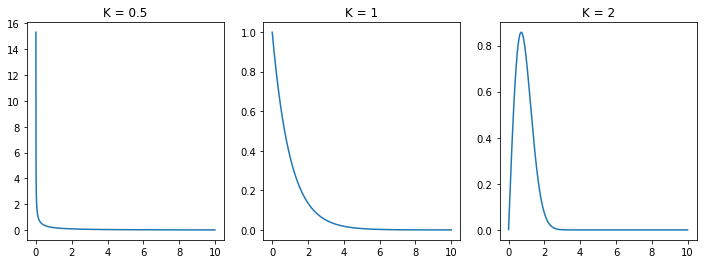

In [6]:
x = np.linspace(.001, 10.0, 10000)
weilbull_pdf_05 = ss.weibull_min.pdf(x, c=0.5)
weilbull_pdf_1 = ss.weibull_min.pdf(x, c=1)
weilbull_pdf_2 = ss.weibull_min.pdf(x, c=2)
f, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].plot(x, weilbull_pdf_05)
axs[0].set_title(f'K = 0.5')
axs[1].plot(x, weilbull_pdf_1)
axs[1].set_title(f'K = 1')
axs[2].plot(x, weilbull_pdf_2)
axs[2].set_title(f'K = 2')
plt.show()

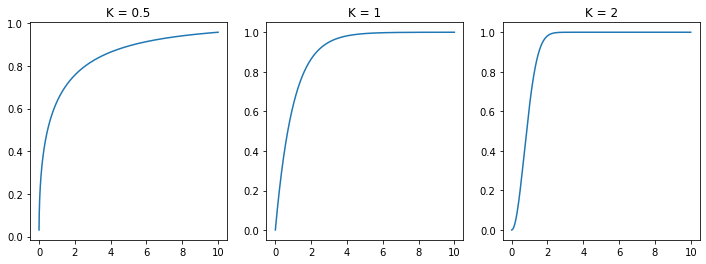

In [7]:
x = np.linspace(.001, 10.0, 10000)
weilbull_cdf_05 = ss.weibull_min.cdf(x, c=0.5)
weilbull_cdf_1 = ss.weibull_min.cdf(x, c=1)
weilbull_cdf_2 = ss.weibull_min.cdf(x, c=2)
f, axs = plt.subplots(1,3, figsize=(12,4))
axs[0].plot(x, weilbull_cdf_05)
axs[0].set_title(f'K = 0.5')
axs[1].plot(x, weilbull_cdf_1)
axs[1].set_title(f'K = 1')
axs[2].plot(x, weilbull_cdf_2)
axs[2].set_title(f'K = 2')
plt.show()

## a)
A group of N=1000 users visits the service for the first time at the time tu=0 and remains active Tu minutes, where Tu is generated randomly with the Weibull distribution W(k=0.5, λ=60) for each user separately. How many users will be active in the successive 150 minutes after the time 0? How many users will be active after 1 day, after 2 days and after 5 days?

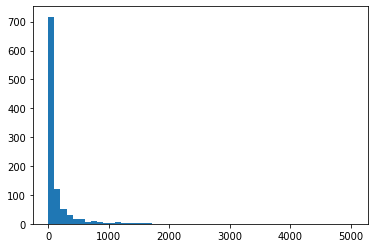

Active users after 150 minutes: 213
Active users after 1440 minutes: 12
Active users after 2880 minutes: 2
Active users after 7200 minutes: 0


In [8]:
k = 0.5
lam = 60
n = 1000
x = ss.weibull_min.rvs(k, loc=0, scale=lam, size=n)

plt.hist(x, bins=50)
plt.show()

mins = [150, 1*24*60, 2*24*60, 5*24*60]
for m in mins:
    print(f'Active users after {m} minutes: {np.sum(x > m)}')

## b)
The same for the W(k=1.0, λ=60), W(k=1.5, λ=60) and W(k=2.5, λ=60). Try to explain
the difference between these models from the practical point of view.

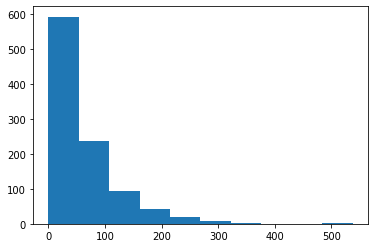

Active users after 150 minutes: 84
Active users after 1440 minutes: 0
Active users after 2880 minutes: 0
Active users after 7200 minutes: 0


In [9]:
k = 1.0
lam = 60
n = 1000
x = ss.weibull_min.rvs(k, loc=0, scale=lam, size=n)

plt.hist(x)
plt.show()

mins = [150, 1*24*60, 2*24*60, 5*24*60]
for m in mins:
    print(f'Active users after {m} minutes: {np.sum(x > m)}')

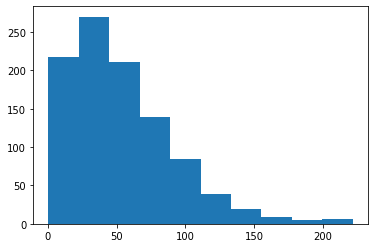

Active users after 150 minutes: 22
Active users after 1440 minutes: 0
Active users after 2880 minutes: 0
Active users after 7200 minutes: 0


In [10]:
k = 1.5
lam = 60
n = 1000
x = ss.weibull_min.rvs(k, loc=0, scale=lam, size=n)

plt.hist(x)
plt.show()

mins = [150, 1*24*60, 2*24*60, 5*24*60]
for m in mins:
    print(f'Active users after {m} minutes: {np.sum(x > m)}')

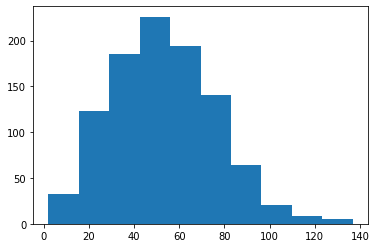

Active users after 150 minutes: 0
Active users after 1440 minutes: 0
Active users after 2880 minutes: 0
Active users after 7200 minutes: 0


In [11]:
k = 2.5
lam = 60
n = 1000
x = ss.weibull_min.rvs(k, loc=0, scale=lam, size=n)

plt.hist(x)
plt.show()

mins = [150, 1*24*60, 2*24*60, 5*24*60]
for m in mins:
    print(f'Active users after {m} minutes: {np.sum(x > m)}')

## c)
Try to replace the Weibull distribution with the Gaussian distribution and set its
parameters in such a way that the numbers of active users after 1 day and after 2 days are
approximately the same than in the case of the Weibull distribution. How many user will be
active after 5 or more days? Try to explain the difference in results between the Weibull
and the Gaussian distribution.

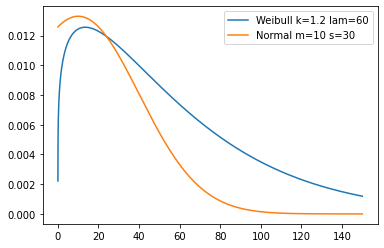

In [14]:
x = np.linspace(.001, 150, 100000)
k=1.2
lam=60
mean=10
sigma=30
weilbull_pdf_05 = ss.weibull_min.pdf(x, c=k, scale=lam)
normal_pdf = ss.norm.pdf(x, loc=mean, scale=sigma)
plt.plot(x, weilbull_pdf_05, label = f'Weibull k={k} lam={lam}')
plt.plot(x, normal_pdf, label = f'Normal m={mean} s={sigma}')
plt.legend()
plt.show()

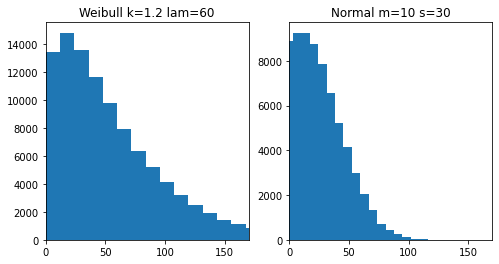

In [15]:
n = 100000
x_w = ss.weibull_min.rvs(k, loc=0, scale=lam, size=n)
x_n = ss.norm.rvs(loc=mean, scale=sigma, size=n)

f,axs = plt.subplots(1,2, figsize=(8,4))
axs[0].hist(x_w, bins=40)
axs[0].set_title(f'Weibull k={k} lam={lam}')
axs[0].set_xlim(0,170)
axs[1].hist(x_n, bins=40)
axs[1].set_title(f'Normal m={mean} s={sigma}')
axs[1].set_xlim(0,170)
plt.show()

## c)
Simulate a group of N=1000000 users that visits the service for the first time at the time
tu generated randomly with the uniform distribution over one year, starting at time 0, for
each user separately and remains active Tu minutes, where Tu is generated randomly with
the Weibull distribution W(k=0.5, λ=60) for each user separately. Plot the number of active
users in the successive days of one year starting at time 0.

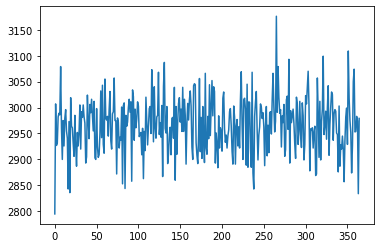

In [44]:
uniform_scale = 1*365*24*60
n = 1000000
lam = 60
k = 0.5
T0 = ss.uniform.rvs(scale=uniform_scale, size=n)
Tu = ss.weibull_min.rvs(k, loc=0, scale=lam, size=n)

T = T0+Tu

active_users = np.zeros(365)
for day in range(365):
    start_of_a_day = day*24*60
    end_of_a_day = (day+1)*24*60
    active_users[day] = np.sum((T0<end_of_a_day)*(T>=start_of_a_day))
    
plt.plot(active_users)
plt.show()

# Assignment 2. (4 points)
Please read the notebook Introduction to Time Series Prediction attached to the lecture
notes.

## a) 
Improve the notebook by splitting the dataset into the train (the first 65% of recorded
data) and the test part (the last 35% of recorded data) and repeating the experiments with
learning the model on the train dataset and testing on the test dataset.

In [132]:
df = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=['Month'])
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

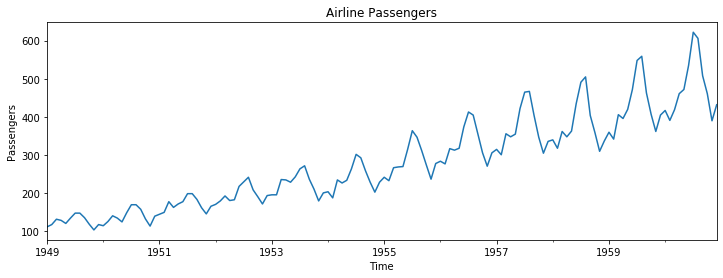

In [133]:
plt.figure(figsize=(12,4))
df['Passengers'].plot()
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.show()

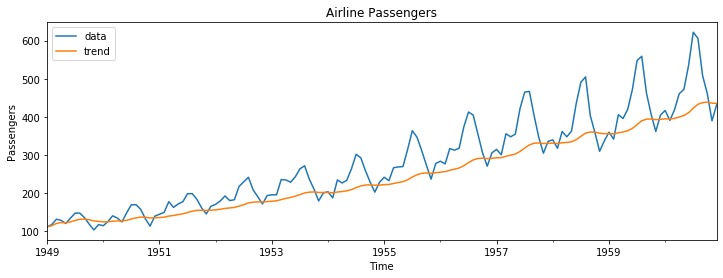

In [134]:
# df['trend'] = df['Passengers'].rolling(window=12, min_periods=1).mean()
# df['trend'] = df['Passengers'].ewm(span=12).mean()
df['trend'] = df['Passengers'].ewm(halflife=12).mean()

plt.figure(figsize=(12,4))
df['Passengers'].plot(label='data')
df['trend'].plot(label='trend')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

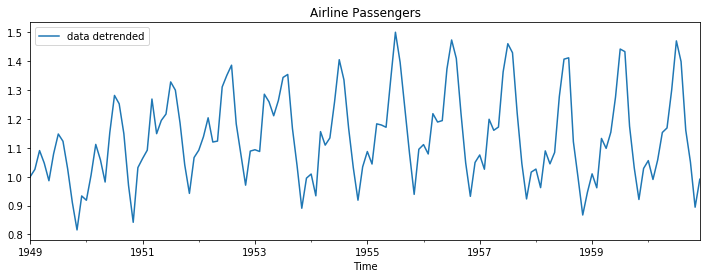

In [135]:
# df['detrended'] = df['Passengers'] - df['trend']
df['detrended'] = df['Passengers'] / df['trend']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

Month
1     1.045050
2     1.028700
3     1.166366
4     1.130612
5     1.131236
6     1.267675
7     1.384267
8     1.352408
9     1.167931
10    1.026496
11    0.904672
12    1.022858
Name: seasonality, dtype: float64

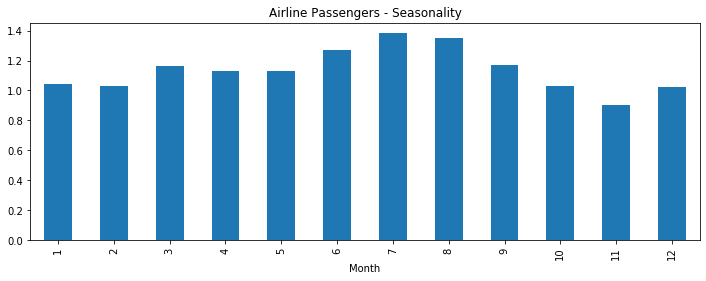

In [136]:
df_seasonality = df['detrended'].groupby(df.index.month).mean().rename('seasonality')
display(df_seasonality)

plt.figure(figsize=(12,4))
df_seasonality.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('')
plt.title('Airline Passengers - Seasonality')
plt.show()

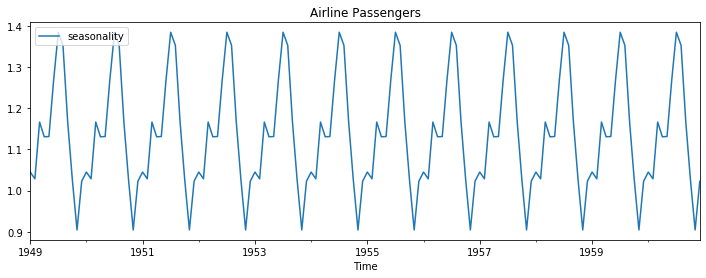

In [137]:
df = df.join(df_seasonality, how='left', on=df.index.month)

plt.figure(figsize=(12,4))
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

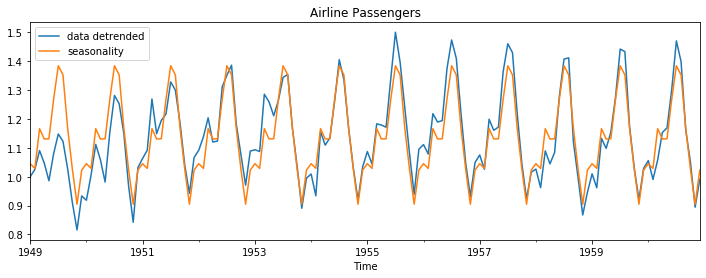

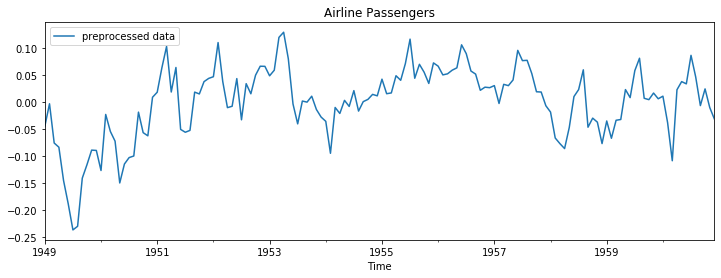

In [138]:
df['preprocessed'] = df['detrended'] - df['seasonality']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

### Approach 1: Prediction by the global mean

In [139]:
org_df = df.copy()

In [140]:
mask = np.array([i < 144*0.65 for i in range(144)])
train_df = org_df[mask].copy()
df = org_df[~mask].copy()

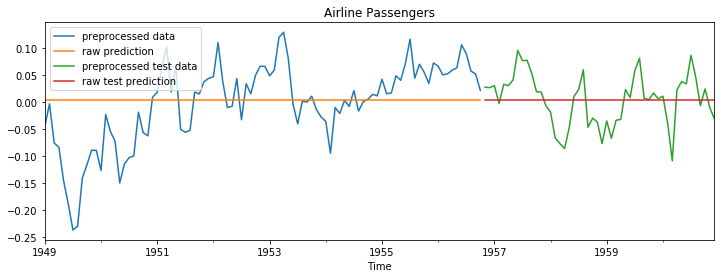

In [141]:
train_df['prediction_raw'] = df['preprocessed'].mean()
df['prediction_raw'] = df['preprocessed'].mean()

plt.figure(figsize=(12,4))
train_df['preprocessed'].plot(label='preprocessed data')
train_df['prediction_raw'].plot(label='raw prediction')
df['preprocessed'].plot(label='preprocessed test data')
df['prediction_raw'].plot(label='raw test prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

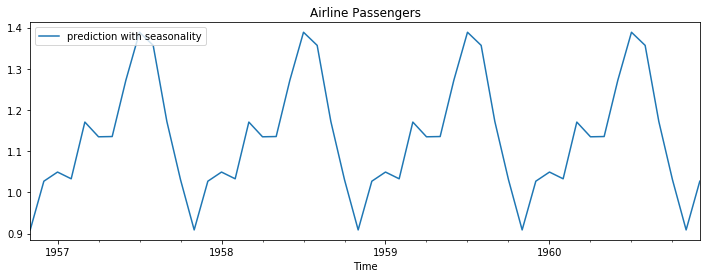

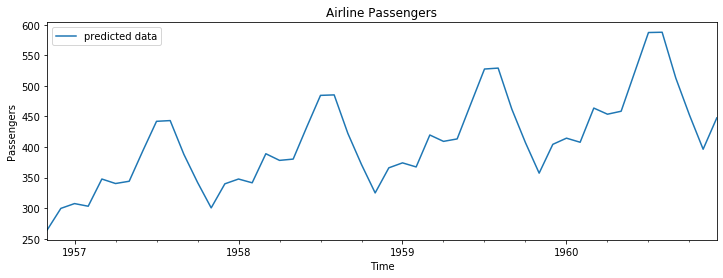

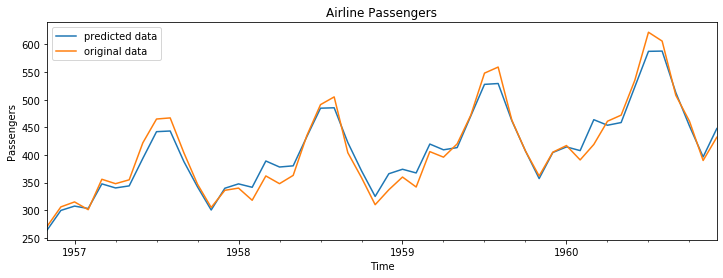

In [142]:
plt.figure(figsize=(12,4))
(df['prediction_raw'] + df['seasonality']).plot(label='prediction with seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
((df['prediction_raw'] + df['seasonality']) * df['trend']).plot(label='predicted data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

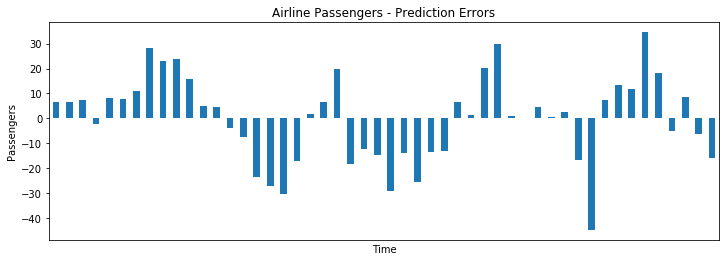

In [143]:
plt.figure(figsize=(12,4))
(df['Passengers'] - df['prediction']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers - Prediction Errors')
plt.show()

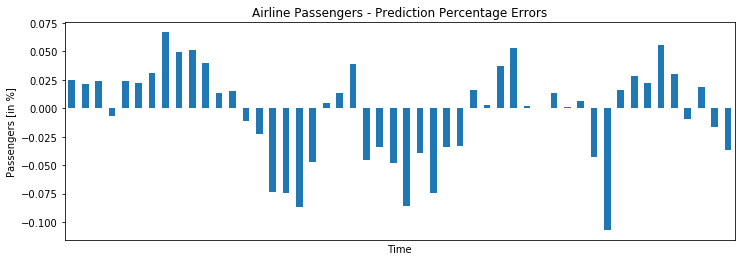

In [144]:
plt.figure(figsize=(12,4))
((df['Passengers'] - df['prediction']) / df['Passengers']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Passengers [in %]')
plt.title('Airline Passengers - Prediction Percentage Errors')
plt.show()

In [145]:
print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

MSE: 285.5159
MAE: 13.5543
MAPE: 0.0334


### Approach 2: Prediction by the previous value

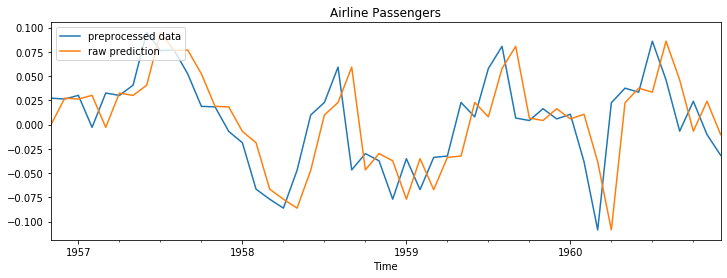

In [146]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0)

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

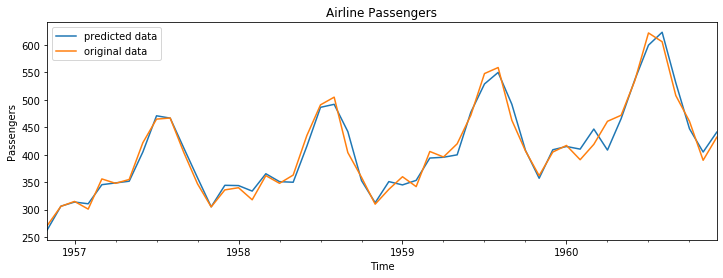

MSE: 232.3420
MAE: 11.2549
MAPE: 0.0270


In [147]:
df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 3: Prediction by the moving average

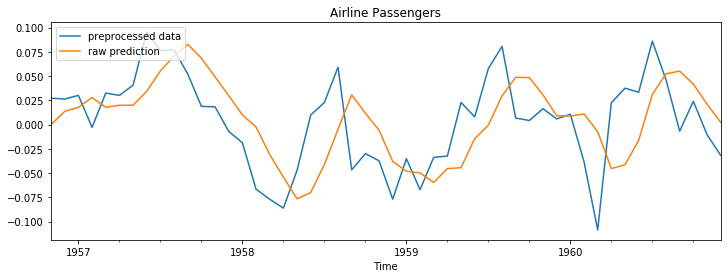

In [148]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=3, min_periods=1).mean()
# df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

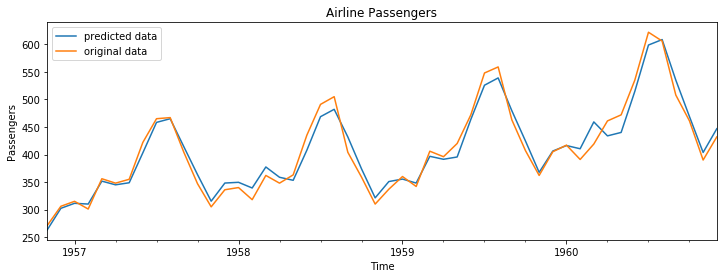

MSE: 272.0287
MAE: 13.8281
MAPE: 0.0334


In [149]:
df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 4: Prediction by the linear regression

In [153]:
reg = linear_model.LinearRegression()

X = train_df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y = train_df['preprocessed'].values[1:]

reg.fit(X, y)

y_predicted = np.zeros(len(train_df))
y_predicted[1:] = reg.predict(X)

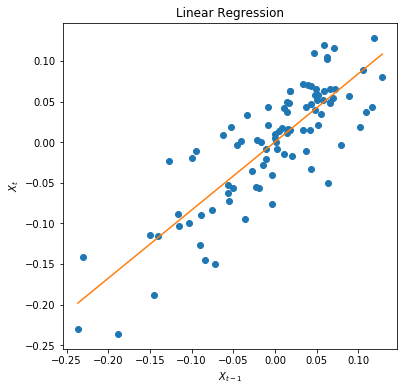

In [154]:
plt.figure(figsize=(6,6))
plt.plot(X[:, 0], y, 'o')
plt.plot([X.min(), X.max()], [reg.coef_[0] * X.min() + reg.intercept_, reg.coef_[0] * X.max() + reg.intercept_], '-')
plt.xlabel('$X_{t-1}$')
plt.ylabel('$X_t$')
plt.title('Linear Regression')
plt.show()

In [156]:
X_test = df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y_predicted = np.zeros(len(df))
y_predicted[1:] = reg.predict(X_test)

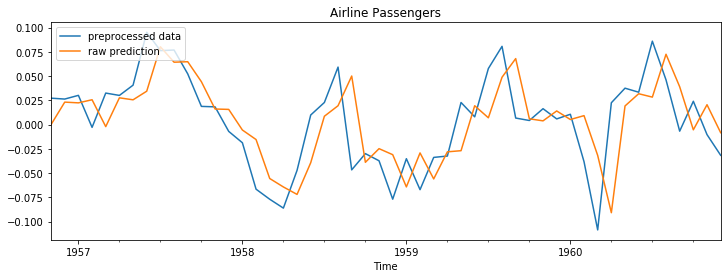

In [157]:
df['prediction_raw'] = y_predicted

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

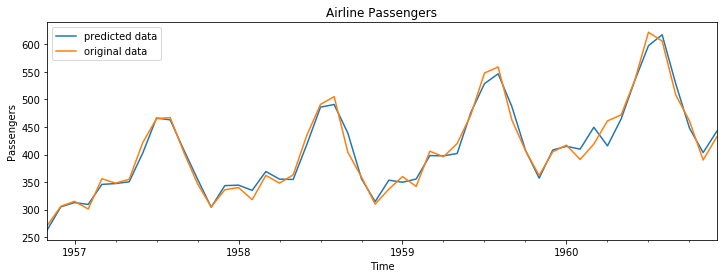

MSE: 202.1504
MAE: 10.7327
MAPE: 0.0259


In [158]:
df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 4a: Prediction by the multidimensional linear regression

In [159]:
def make_prediction_with_linear_regression(df, y_predicted):
    df['prediction_raw'] = y_predicted

    plt.figure(figsize=(12,4))
    df['preprocessed'].plot(label='preprocessed data')
    df['prediction_raw'].plot(label='raw prediction')
    plt.xlabel('Time')
    plt.ylabel('')
    plt.title('Airline Passengers')
    plt.legend(loc='upper left')
    plt.show()

    df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

    plt.figure(figsize=(12,4))
    df['prediction'].plot(label='predicted data')
    df['Passengers'].plot(label='original data')
    plt.xlabel('Time')
    plt.ylabel('Passengers')
    plt.title('Airline Passengers')
    plt.legend(loc='upper left')
    plt.show()

    print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
    print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
    print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

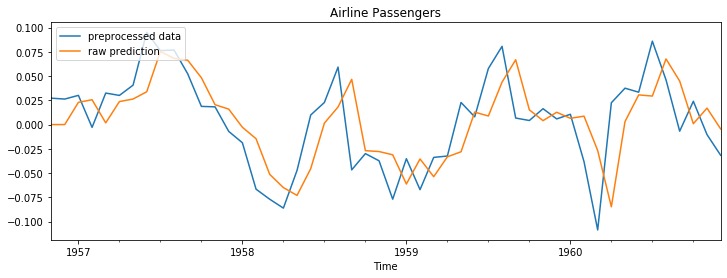

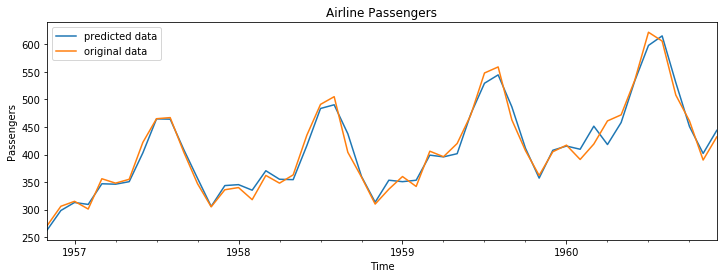

MSE: 203.4951
MAE: 10.9174
MAPE: 0.0264


In [160]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['preprocessed'].shift(1).values[2:],
    train_df['preprocessed'].shift(2).values[2:]
]).T
y = train_df['preprocessed'].values[2:]

reg.fit(X, y)

X_test = np.vstack([
    df['preprocessed'].shift(1).values[2:],
    df['preprocessed'].shift(2).values[2:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[2:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

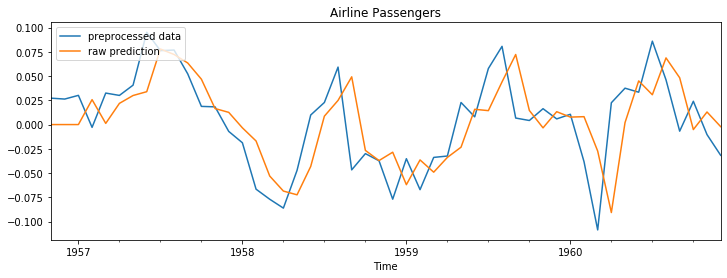

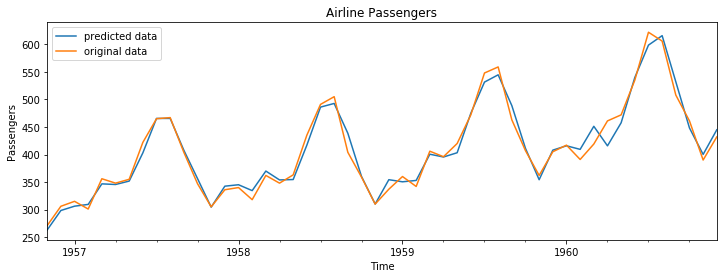

MSE: 208.2732
MAE: 10.9590
MAPE: 0.0265


In [161]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['preprocessed'].shift(1).values[3:],
    train_df['preprocessed'].shift(2).values[3:],
    train_df['preprocessed'].shift(3).values[3:]
]).T
y = train_df['preprocessed'].values[3:]

reg.fit(X, y)

X_test = np.vstack([
    df['preprocessed'].shift(1).values[3:],
    df['preprocessed'].shift(2).values[3:],
    df['preprocessed'].shift(3).values[3:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[3:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

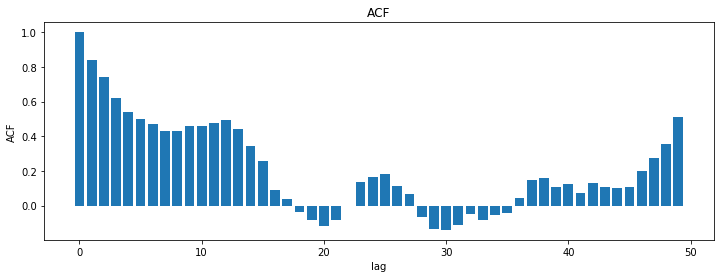

In [162]:
acf = np.zeros(50)
for lag in range(len(acf)):
    acf[lag] = np.corrcoef(train_df['preprocessed'][lag:], train_df['preprocessed'].shift(lag)[lag:])[0, 1]

plt.figure(figsize=(12,4))
plt.bar(range(len(acf)), acf)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.title('ACF')
plt.show()

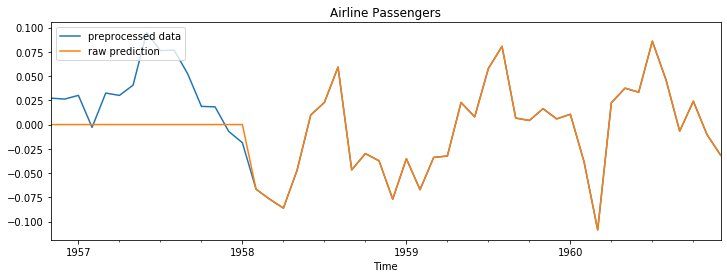

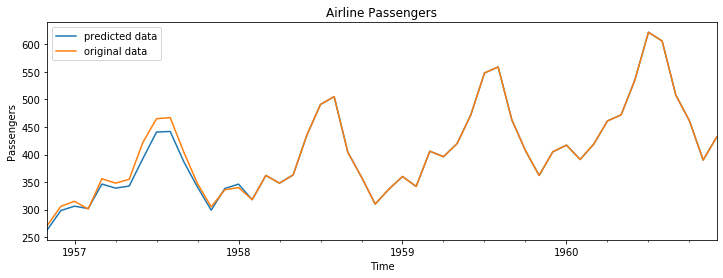

MSE: 60.7229
MAE: 3.4657
MAPE: 0.0091


In [164]:
reg = linear_model.LinearRegression()

X = np.vstack([train_df['preprocessed'].shift(lag).values[15:] for lag in range(15)]).T
y = train_df['preprocessed'].values[15:]

reg.fit(X, y)

X_test = np.vstack([df['preprocessed'].shift(lag).values[15:] for lag in range(15)]).T
y_predicted = np.zeros(len(df))
y_predicted[15:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

## b) 
Is it necessary to remove the trend and the seasonality before the regression? Try to
check if it really affects the prediction accuracy.


### Approach 4: Prediction by the linear regression

In [167]:
reg = linear_model.LinearRegression()

X = train_df['Passengers'].shift(1).values[1:].reshape(-1, 1)
y = train_df['Passengers'].values[1:]

reg.fit(X, y)

y_predicted = np.zeros(len(train_df))
y_predicted[1:] = reg.predict(X)

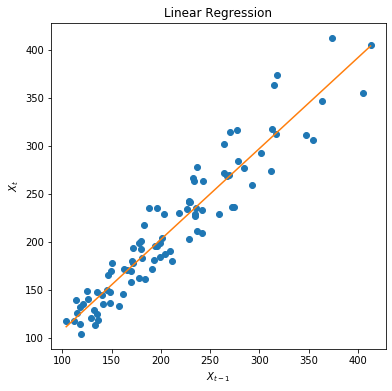

In [168]:
plt.figure(figsize=(6,6))
plt.plot(X[:, 0], y, 'o')
plt.plot([X.min(), X.max()], [reg.coef_[0] * X.min() + reg.intercept_, reg.coef_[0] * X.max() + reg.intercept_], '-')
plt.xlabel('$X_{t-1}$')
plt.ylabel('$X_t$')
plt.title('Linear Regression')
plt.show()

In [169]:
X_test = df['Passengers'].shift(1).values[1:].reshape(-1, 1)
y_predicted = np.zeros(len(df))
y_predicted[1:] = reg.predict(X_test)

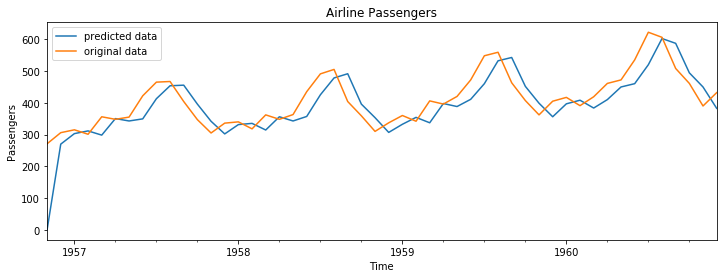

MSE: 3711.6094
MAE: 45.1411
MAPE: 0.1149


In [170]:
df['prediction'] = y_predicted

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 4a: Prediction by the multidimensional linear regression

In [171]:
def make_prediction_with_linear_regression(df, y_predicted):
    df['prediction'] = y_predicted

    plt.figure(figsize=(12,4))
    df['prediction'].plot(label='predicted data')
    df['Passengers'].plot(label='original data')
    plt.xlabel('Time')
    plt.ylabel('Passengers')
    plt.title('Airline Passengers')
    plt.legend(loc='upper left')
    plt.show()

    print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
    print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
    print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

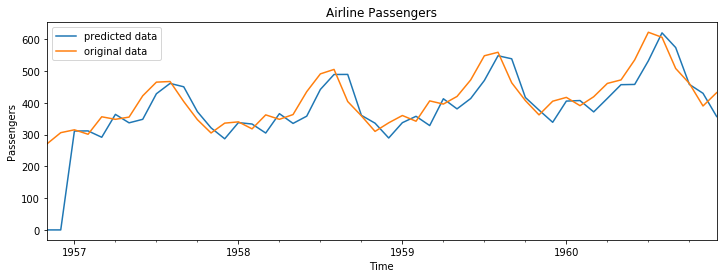

MSE: 5344.6400
MAE: 47.0790
MAPE: 0.1244


In [172]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['Passengers'].shift(1).values[2:],
    train_df['Passengers'].shift(2).values[2:]
]).T
y = train_df['Passengers'].values[2:]

reg.fit(X, y)

X_test = np.vstack([
    df['Passengers'].shift(1).values[2:],
    df['Passengers'].shift(2).values[2:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[2:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

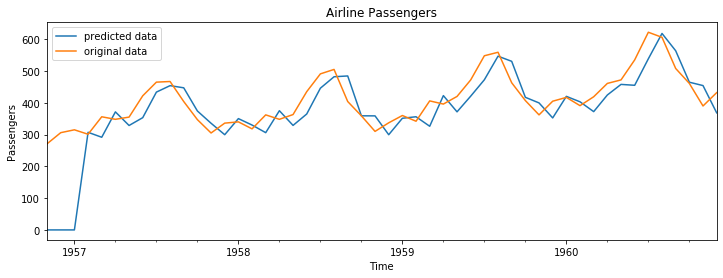

MSE: 7224.2227
MAE: 53.3564
MAPE: 0.1453


In [173]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['Passengers'].shift(1).values[3:],
    train_df['Passengers'].shift(2).values[3:],
    train_df['Passengers'].shift(3).values[3:]
]).T
y = train_df['Passengers'].values[3:]

reg.fit(X, y)

X_test = np.vstack([
    df['Passengers'].shift(1).values[3:],
    df['Passengers'].shift(2).values[3:],
    df['Passengers'].shift(3).values[3:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[3:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

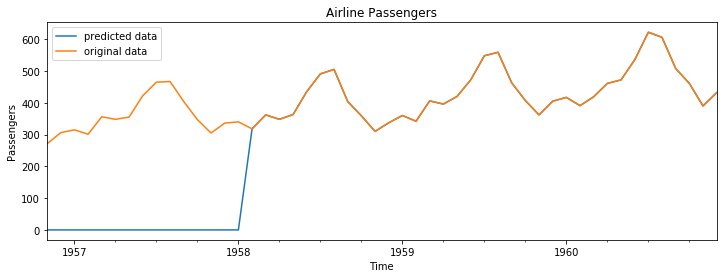

MSE: 38966.2400
MAE: 106.7600
MAPE: 0.3000


In [175]:
reg = linear_model.LinearRegression()

X = np.vstack([train_df['Passengers'].shift(lag).values[15:] for lag in range(15)]).T
y = train_df['Passengers'].values[15:]

reg.fit(X, y)

X_test = np.vstack([df['Passengers'].shift(lag).values[15:] for lag in range(15)]).T
y_predicted = np.zeros(len(df))
y_predicted[15:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

## c) 
In order to remove the trend, the original data are divided by the trend. Please try to
replace it with subtracting the trend from the original data. How does it change the
characteristic of the detrended data? Does it improve the prediction accuracy?

In [199]:
df = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=['Month'])
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

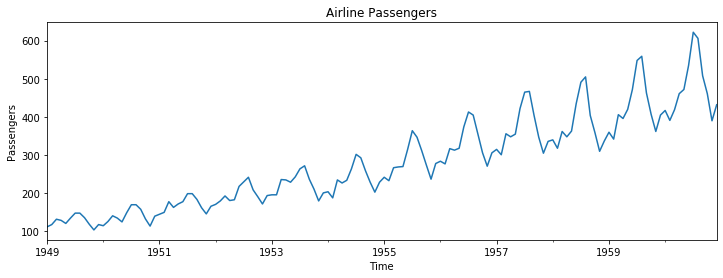

In [200]:
plt.figure(figsize=(12,4))
df['Passengers'].plot()
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.show()

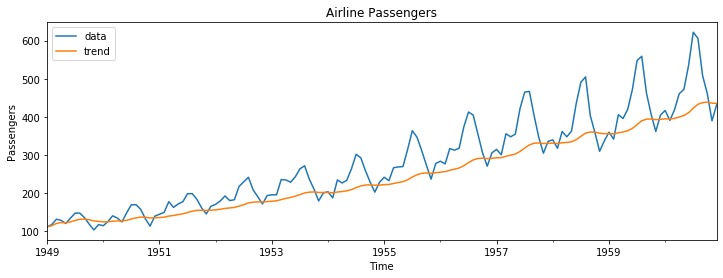

In [201]:
# df['trend'] = df['Passengers'].rolling(window=12, min_periods=1).mean()
# df['trend'] = df['Passengers'].ewm(span=12).mean()
df['trend'] = df['Passengers'].ewm(halflife=12).mean()

plt.figure(figsize=(12,4))
df['Passengers'].plot(label='data')
df['trend'].plot(label='trend')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

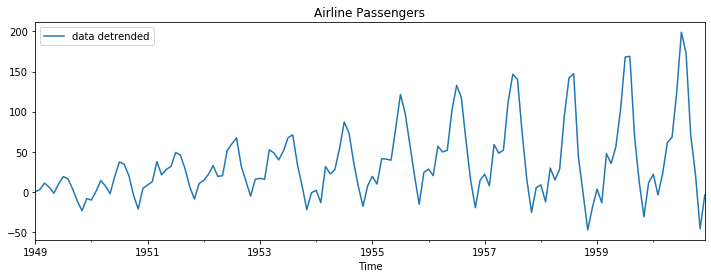

In [202]:
df['detrended'] = df['Passengers'] - df['trend']
#df['detrended'] = df['Passengers'] / df['trend']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

Month
1      11.276728
2       4.004635
3      36.406970
4      31.227623
5      33.935568
6      69.347640
7     102.471324
8      96.147407
9      44.689345
10      8.433703
11    -23.700117
12      5.025461
Name: seasonality, dtype: float64

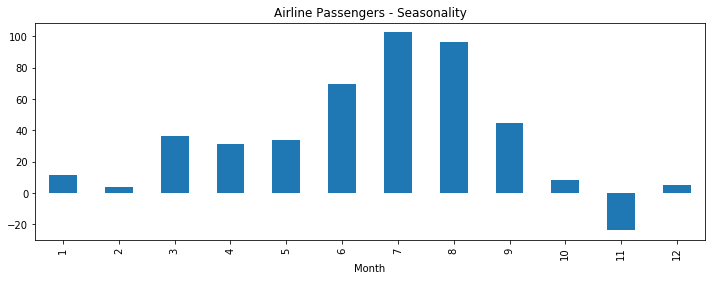

In [203]:
df_seasonality = df['detrended'].groupby(df.index.month).mean().rename('seasonality')
display(df_seasonality)

plt.figure(figsize=(12,4))
df_seasonality.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('')
plt.title('Airline Passengers - Seasonality')
plt.show()

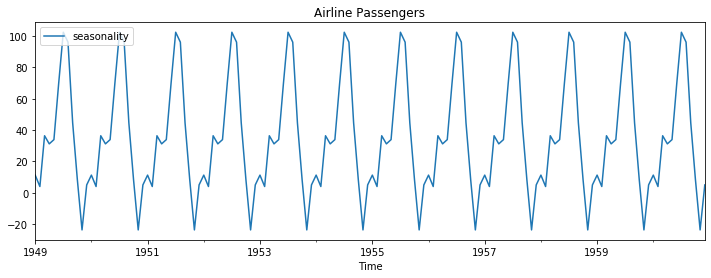

In [204]:
df = df.join(df_seasonality, how='left', on=df.index.month)

plt.figure(figsize=(12,4))
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

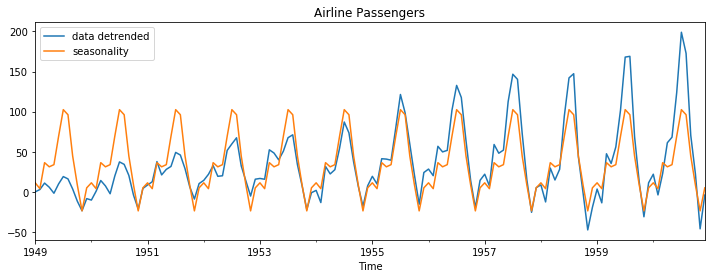

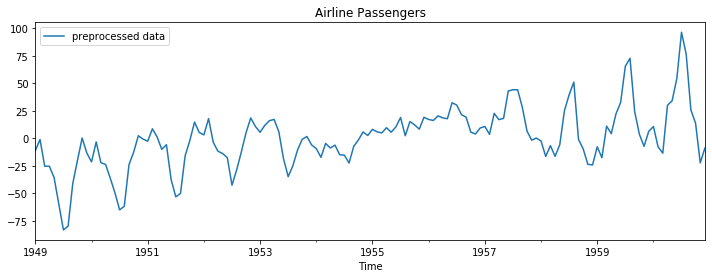

In [205]:
df['preprocessed'] = df['detrended'] - df['seasonality']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

### Approach 1: Prediction by the global mean

In [206]:
org_df = df.copy()

In [207]:
mask = np.array([i < 144*0.65 for i in range(144)])
train_df = org_df[mask].copy()
df = org_df[~mask].copy()

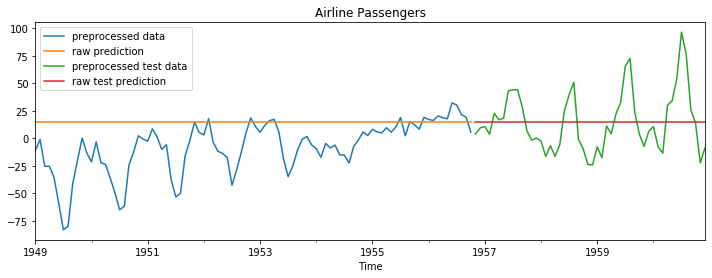

In [208]:
train_df['prediction_raw'] = df['preprocessed'].mean()
df['prediction_raw'] = df['preprocessed'].mean()

plt.figure(figsize=(12,4))
train_df['preprocessed'].plot(label='preprocessed data')
train_df['prediction_raw'].plot(label='raw prediction')
df['preprocessed'].plot(label='preprocessed test data')
df['prediction_raw'].plot(label='raw test prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

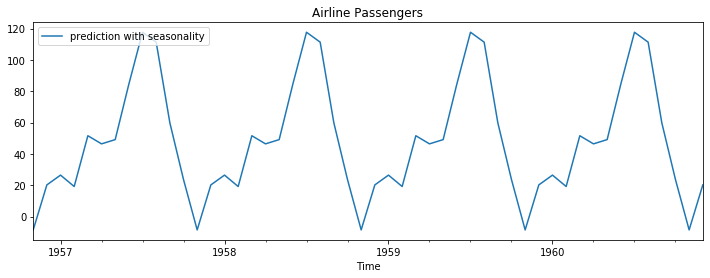

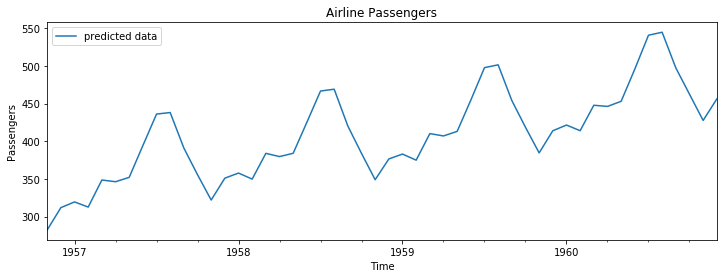

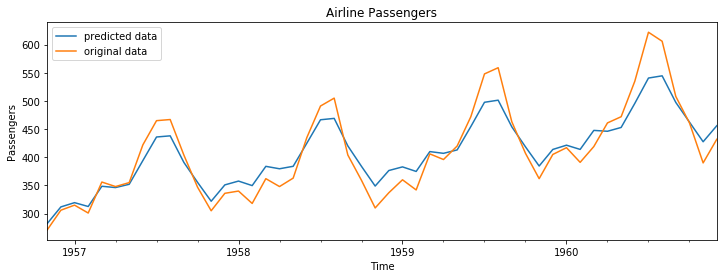

In [209]:
plt.figure(figsize=(12,4))
(df['prediction_raw'] + df['seasonality']).plot(label='prediction with seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
((df['prediction_raw'] + df['seasonality']) + df['trend']).plot(label='predicted data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

df['prediction'] = (df['prediction_raw'] + df['seasonality']) + df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

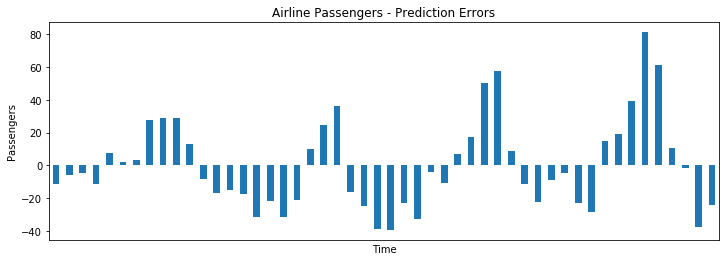

In [210]:
plt.figure(figsize=(12,4))
(df['Passengers'] - df['prediction']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers - Prediction Errors')
plt.show()

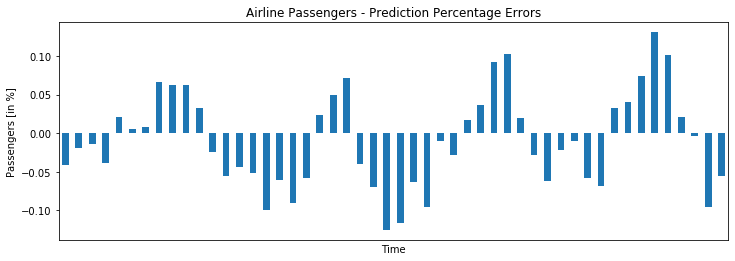

In [211]:
plt.figure(figsize=(12,4))
((df['Passengers'] - df['prediction']) / df['Passengers']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Passengers [in %]')
plt.title('Airline Passengers - Prediction Percentage Errors')
plt.show()

In [212]:
print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

MSE: 749.9676
MAE: 21.9804
MAPE: 0.0524


### Approach 2: Prediction by the previous value

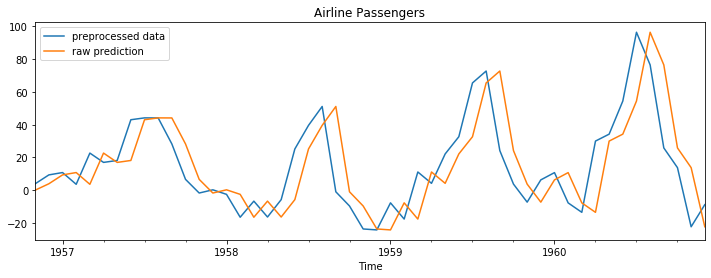

In [213]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0)

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

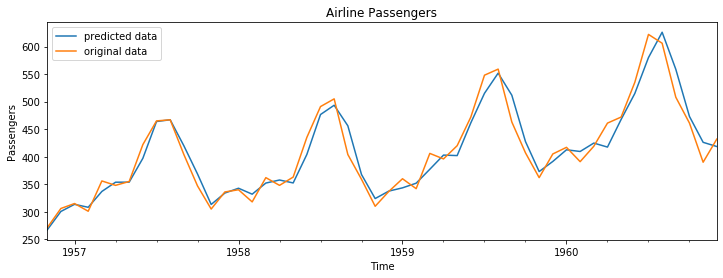

MSE: 434.0906
MAE: 15.8535
MAPE: 0.0375


In [214]:
df['prediction'] = (df['prediction_raw'] + df['seasonality']) + df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 3: Prediction by the moving average

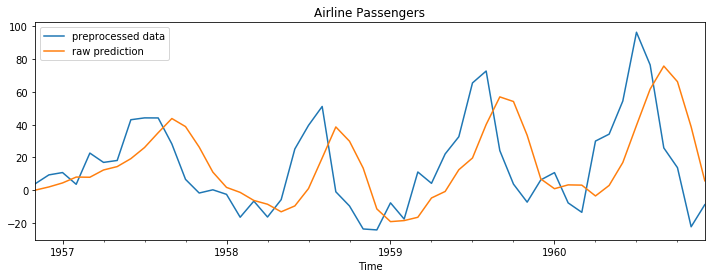

In [215]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=3, min_periods=1).mean()
# df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

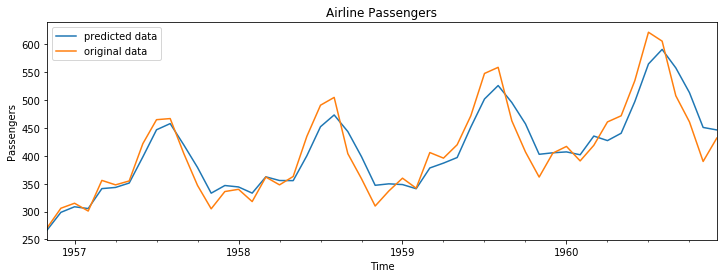

MSE: 786.9408
MAE: 22.7456
MAPE: 0.0539


In [216]:
df['prediction'] = (df['prediction_raw'] + df['seasonality']) + df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 4: Prediction by the linear regression

In [217]:
reg = linear_model.LinearRegression()

X = train_df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y = train_df['preprocessed'].values[1:]

reg.fit(X, y)

y_predicted = np.zeros(len(train_df))
y_predicted[1:] = reg.predict(X)

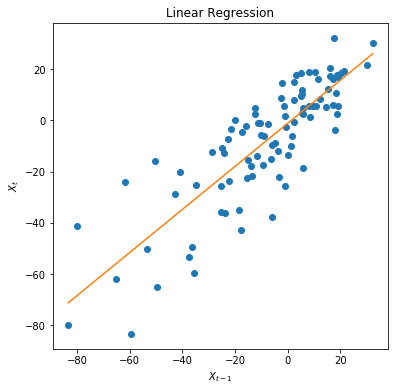

In [218]:
plt.figure(figsize=(6,6))
plt.plot(X[:, 0], y, 'o')
plt.plot([X.min(), X.max()], [reg.coef_[0] * X.min() + reg.intercept_, reg.coef_[0] * X.max() + reg.intercept_], '-')
plt.xlabel('$X_{t-1}$')
plt.ylabel('$X_t$')
plt.title('Linear Regression')
plt.show()

In [219]:
X_test = df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y_predicted = np.zeros(len(df))
y_predicted[1:] = reg.predict(X_test)

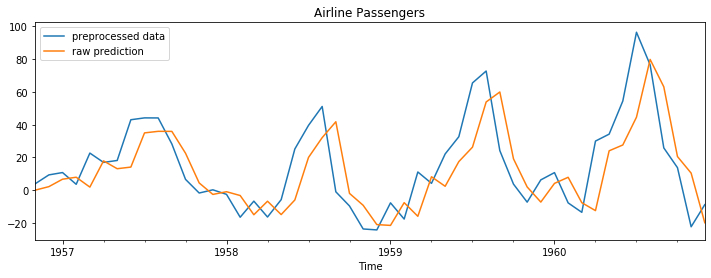

In [220]:
df['prediction_raw'] = y_predicted

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

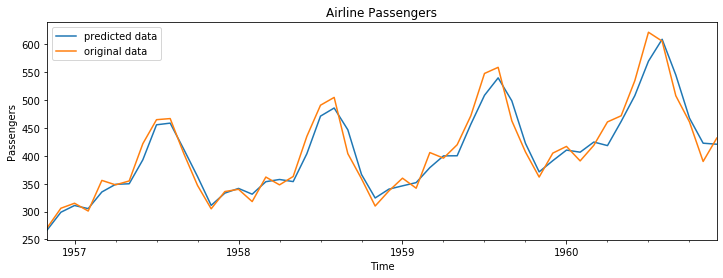

MSE: 396.1514
MAE: 15.5607
MAPE: 0.0364


In [221]:
df['prediction'] = (df['prediction_raw'] + df['seasonality']) + df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 4a: Prediction by the multidimensional linear regression

In [222]:
def make_prediction_with_linear_regression(df, y_predicted):
    df['prediction_raw'] = y_predicted

    plt.figure(figsize=(12,4))
    df['preprocessed'].plot(label='preprocessed data')
    df['prediction_raw'].plot(label='raw prediction')
    plt.xlabel('Time')
    plt.ylabel('')
    plt.title('Airline Passengers')
    plt.legend(loc='upper left')
    plt.show()

    df['prediction'] = (df['prediction_raw'] + df['seasonality']) + df['trend']

    plt.figure(figsize=(12,4))
    df['prediction'].plot(label='predicted data')
    df['Passengers'].plot(label='original data')
    plt.xlabel('Time')
    plt.ylabel('Passengers')
    plt.title('Airline Passengers')
    plt.legend(loc='upper left')
    plt.show()

    print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
    print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
    print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

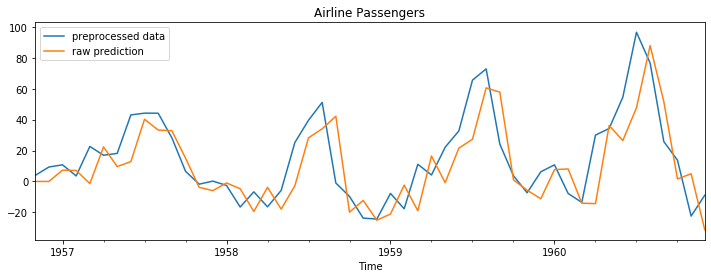

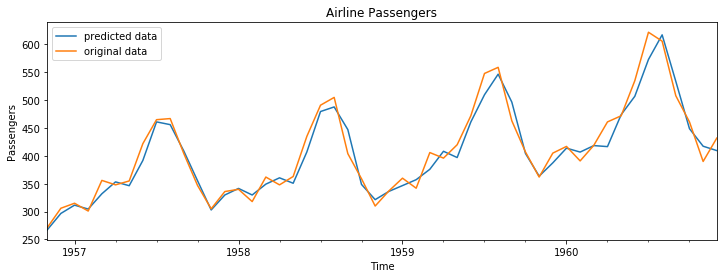

MSE: 373.2742
MAE: 14.9951
MAPE: 0.0352


In [223]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['preprocessed'].shift(1).values[2:],
    train_df['preprocessed'].shift(2).values[2:]
]).T
y = train_df['preprocessed'].values[2:]

reg.fit(X, y)

X_test = np.vstack([
    df['preprocessed'].shift(1).values[2:],
    df['preprocessed'].shift(2).values[2:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[2:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

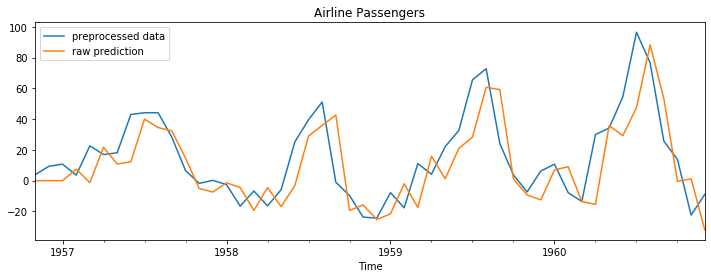

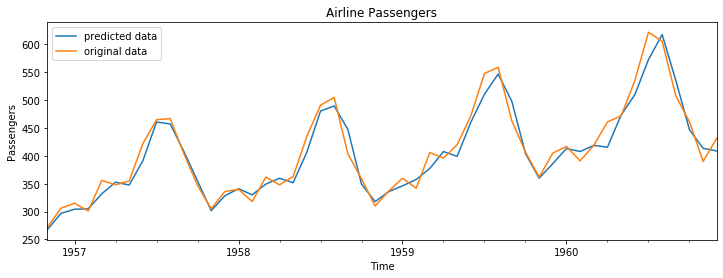

MSE: 371.0283
MAE: 14.9829
MAPE: 0.0353


In [224]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['preprocessed'].shift(1).values[3:],
    train_df['preprocessed'].shift(2).values[3:],
    train_df['preprocessed'].shift(3).values[3:]
]).T
y = train_df['preprocessed'].values[3:]

reg.fit(X, y)

X_test = np.vstack([
    df['preprocessed'].shift(1).values[3:],
    df['preprocessed'].shift(2).values[3:],
    df['preprocessed'].shift(3).values[3:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[3:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

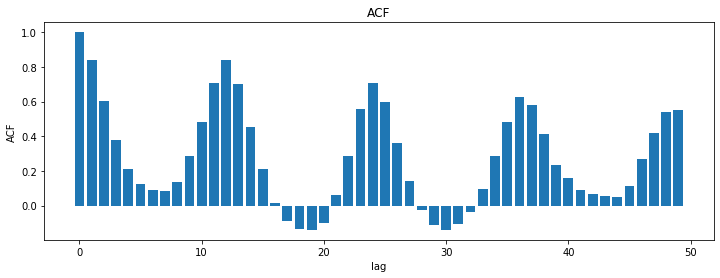

In [225]:
acf = np.zeros(50)
for lag in range(len(acf)):
    acf[lag] = np.corrcoef(train_df['preprocessed'][lag:], train_df['preprocessed'].shift(lag)[lag:])[0, 1]

plt.figure(figsize=(12,4))
plt.bar(range(len(acf)), acf)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.title('ACF')
plt.show()

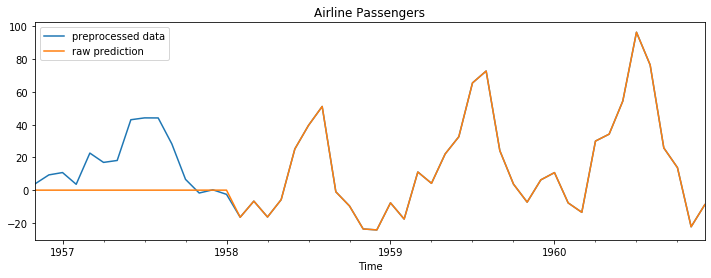

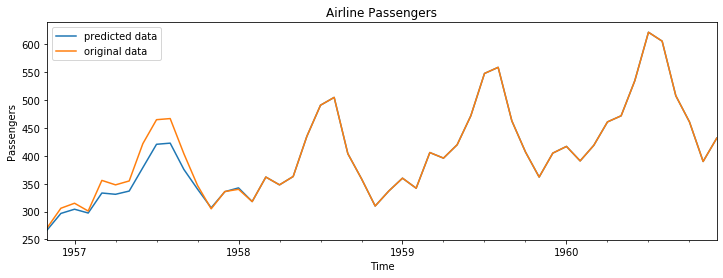

MSE: 159.1228
MAE: 5.1181
MAPE: 0.0130


In [226]:
reg = linear_model.LinearRegression()

X = np.vstack([train_df['preprocessed'].shift(lag).values[15:] for lag in range(15)]).T
y = train_df['preprocessed'].values[15:]

reg.fit(X, y)

X_test = np.vstack([df['preprocessed'].shift(lag).values[15:] for lag in range(15)]).T
y_predicted = np.zeros(len(df))
y_predicted[15:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

## d) 
Similarly, in order to remove the seasonality, the seasonality is subtracted from the
detrended data. Please try to replace it with dividing the detrended data by the seasonality.
How does it change the characteristic of the preprocessed data? Does it improve the
prediction accuracy?

In [227]:
df = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=['Month'])
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

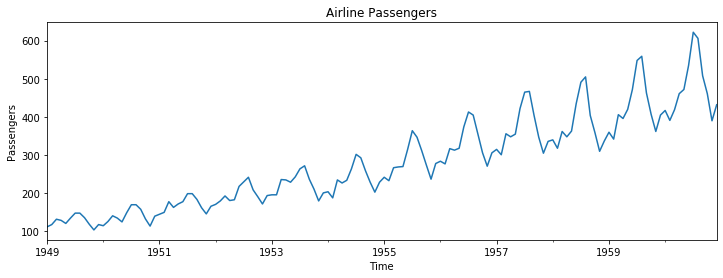

In [228]:
plt.figure(figsize=(12,4))
df['Passengers'].plot()
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.show()

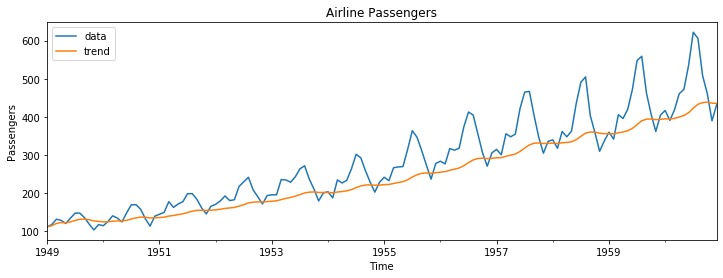

In [229]:
# df['trend'] = df['Passengers'].rolling(window=12, min_periods=1).mean()
# df['trend'] = df['Passengers'].ewm(span=12).mean()
df['trend'] = df['Passengers'].ewm(halflife=12).mean()

plt.figure(figsize=(12,4))
df['Passengers'].plot(label='data')
df['trend'].plot(label='trend')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

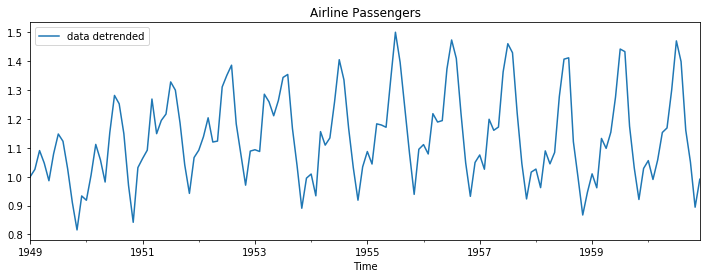

In [230]:
# df['detrended'] = df['Passengers'] - df['trend']
df['detrended'] = df['Passengers'] / df['trend']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

Month
1     1.045050
2     1.028700
3     1.166366
4     1.130612
5     1.131236
6     1.267675
7     1.384267
8     1.352408
9     1.167931
10    1.026496
11    0.904672
12    1.022858
Name: seasonality, dtype: float64

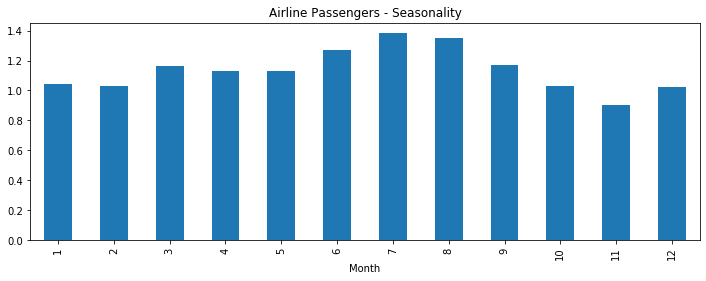

In [231]:
df_seasonality = df['detrended'].groupby(df.index.month).mean().rename('seasonality')
display(df_seasonality)

plt.figure(figsize=(12,4))
df_seasonality.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('')
plt.title('Airline Passengers - Seasonality')
plt.show()

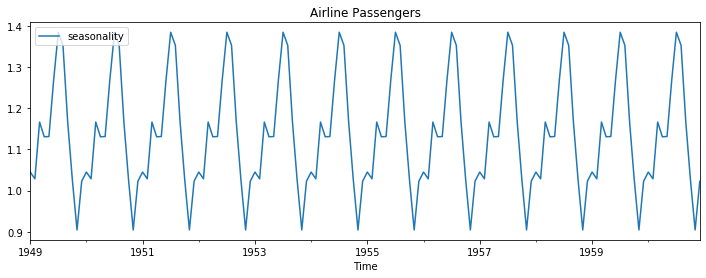

In [232]:
df = df.join(df_seasonality, how='left', on=df.index.month)

plt.figure(figsize=(12,4))
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

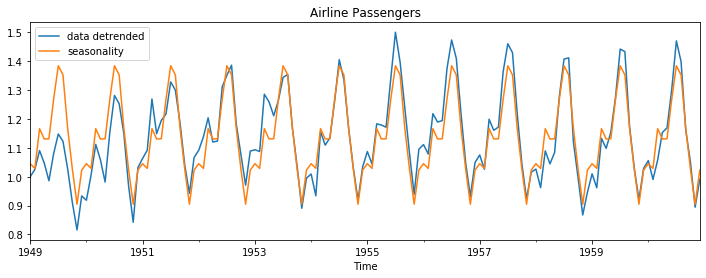

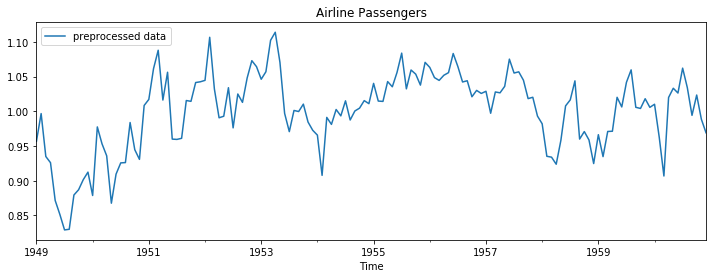

In [233]:
df['preprocessed'] = df['detrended'] / df['seasonality']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

### Approach 1: Prediction by the global mean

In [234]:
org_df = df.copy()

In [235]:
mask = np.array([i < 144*0.65 for i in range(144)])
train_df = org_df[mask].copy()
df = org_df[~mask].copy()

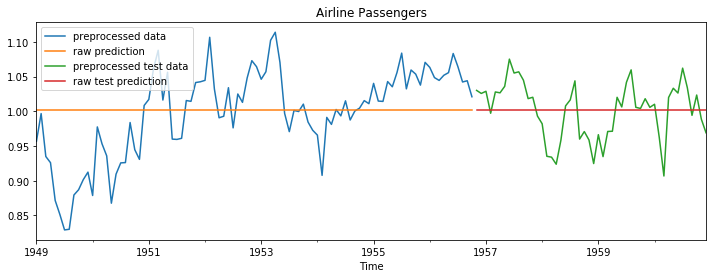

In [236]:
train_df['prediction_raw'] = df['preprocessed'].mean()
df['prediction_raw'] = df['preprocessed'].mean()

plt.figure(figsize=(12,4))
train_df['preprocessed'].plot(label='preprocessed data')
train_df['prediction_raw'].plot(label='raw prediction')
df['preprocessed'].plot(label='preprocessed test data')
df['prediction_raw'].plot(label='raw test prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

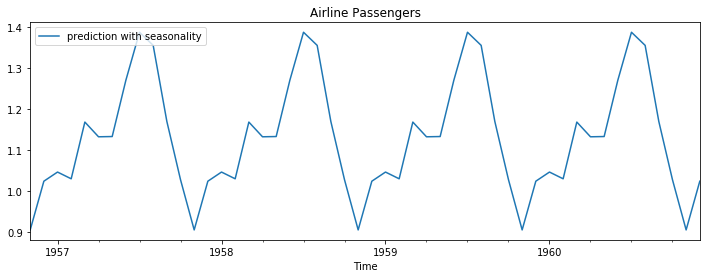

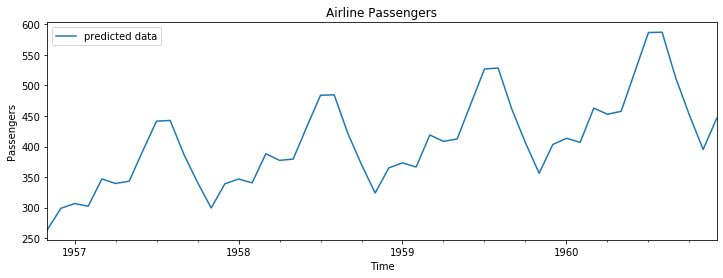

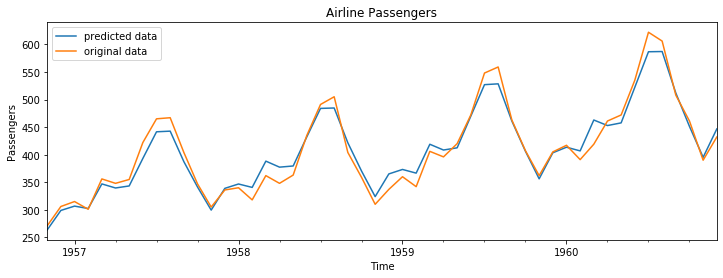

In [237]:
plt.figure(figsize=(12,4))
(df['prediction_raw'] * df['seasonality']).plot(label='prediction with seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
((df['prediction_raw'] * df['seasonality']) * df['trend']).plot(label='predicted data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

df['prediction'] = (df['prediction_raw'] * df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

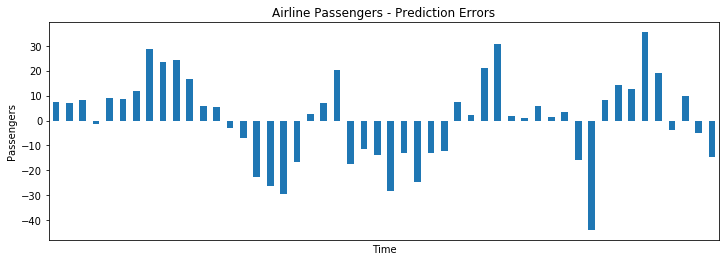

In [238]:
plt.figure(figsize=(12,4))
(df['Passengers'] - df['prediction']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers - Prediction Errors')
plt.show()

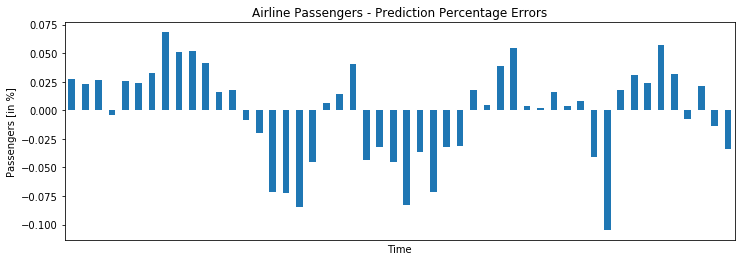

In [239]:
plt.figure(figsize=(12,4))
((df['Passengers'] - df['prediction']) / df['Passengers']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Passengers [in %]')
plt.title('Airline Passengers - Prediction Percentage Errors')
plt.show()

In [240]:
print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

MSE: 284.5481
MAE: 13.6876
MAPE: 0.0336


### Approach 2: Prediction by the previous value

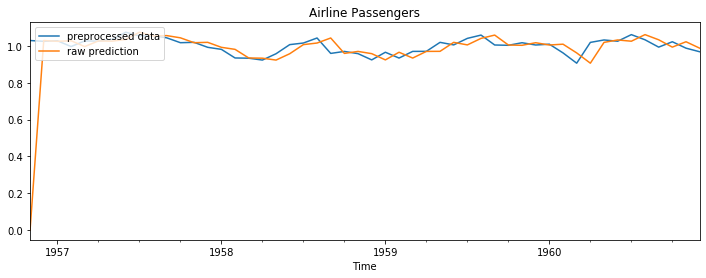

In [241]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0)

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

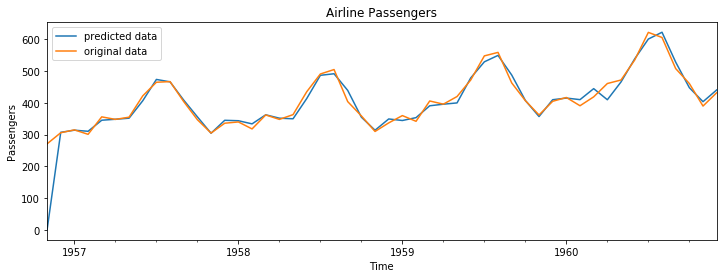

MSE: 1682.3443
MAE: 16.2136
MAPE: 0.0457


In [242]:
df['prediction'] = (df['prediction_raw'] * df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 3: Prediction by the moving average

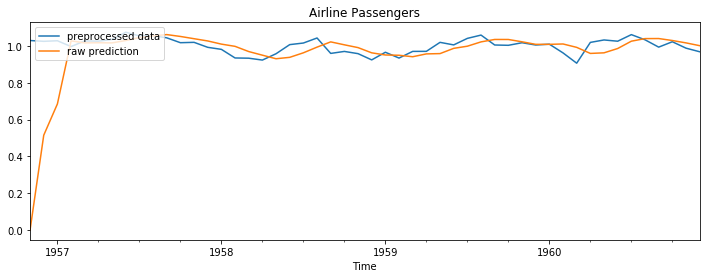

In [243]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=3, min_periods=1).mean()
# df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

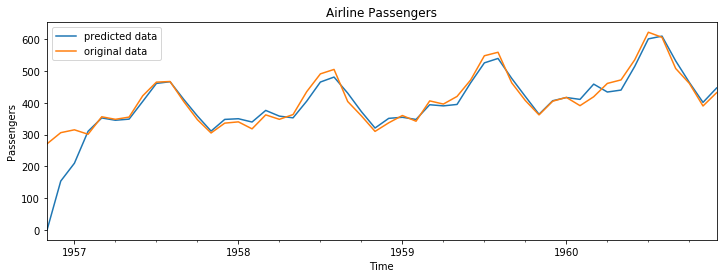

MSE: 2410.9378
MAE: 23.4177
MAPE: 0.0673


In [244]:
df['prediction'] = (df['prediction_raw'] * df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 4: Prediction by the linear regression

In [245]:
reg = linear_model.LinearRegression()

X = train_df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y = train_df['preprocessed'].values[1:]

reg.fit(X, y)

y_predicted = np.zeros(len(train_df))
y_predicted[1:] = reg.predict(X)

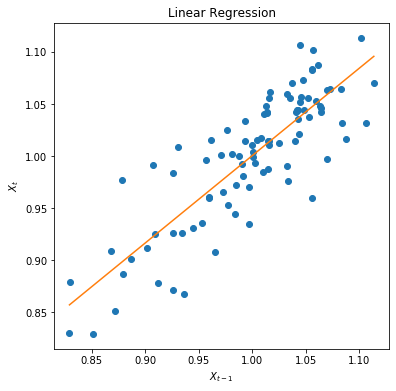

In [246]:
plt.figure(figsize=(6,6))
plt.plot(X[:, 0], y, 'o')
plt.plot([X.min(), X.max()], [reg.coef_[0] * X.min() + reg.intercept_, reg.coef_[0] * X.max() + reg.intercept_], '-')
plt.xlabel('$X_{t-1}$')
plt.ylabel('$X_t$')
plt.title('Linear Regression')
plt.show()

In [247]:
X_test = df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y_predicted = np.zeros(len(df))
y_predicted[1:] = reg.predict(X_test)

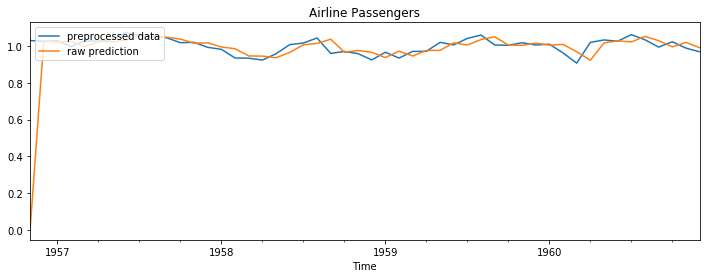

In [248]:
df['prediction_raw'] = y_predicted

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

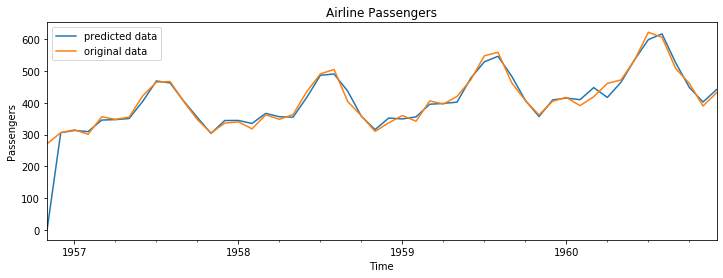

MSE: 1655.1976
MAE: 15.7028
MAPE: 0.0446


In [249]:
df['prediction'] = (df['prediction_raw'] * df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 4a: Prediction by the multidimensional linear regression

In [250]:
def make_prediction_with_linear_regression(df, y_predicted):
    df['prediction_raw'] = y_predicted

    plt.figure(figsize=(12,4))
    df['preprocessed'].plot(label='preprocessed data')
    df['prediction_raw'].plot(label='raw prediction')
    plt.xlabel('Time')
    plt.ylabel('')
    plt.title('Airline Passengers')
    plt.legend(loc='upper left')
    plt.show()

    df['prediction'] = (df['prediction_raw'] * df['seasonality']) * df['trend']

    plt.figure(figsize=(12,4))
    df['prediction'].plot(label='predicted data')
    df['Passengers'].plot(label='original data')
    plt.xlabel('Time')
    plt.ylabel('Passengers')
    plt.title('Airline Passengers')
    plt.legend(loc='upper left')
    plt.show()

    print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
    print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
    print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

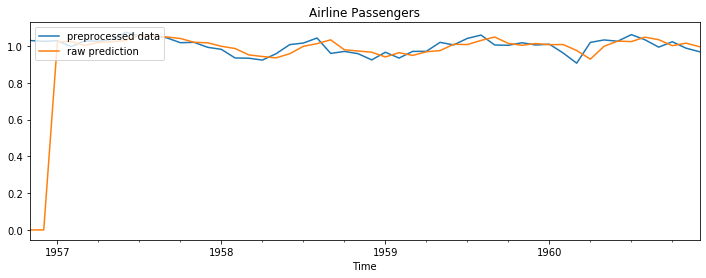

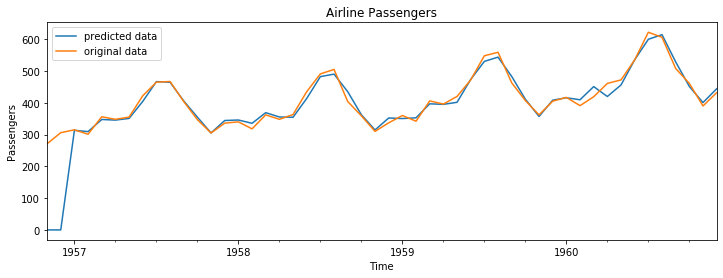

MSE: 3529.6749
MAE: 21.9102
MAPE: 0.0648


In [251]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['preprocessed'].shift(1).values[2:],
    train_df['preprocessed'].shift(2).values[2:]
]).T
y = train_df['preprocessed'].values[2:]

reg.fit(X, y)

X_test = np.vstack([
    df['preprocessed'].shift(1).values[2:],
    df['preprocessed'].shift(2).values[2:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[2:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

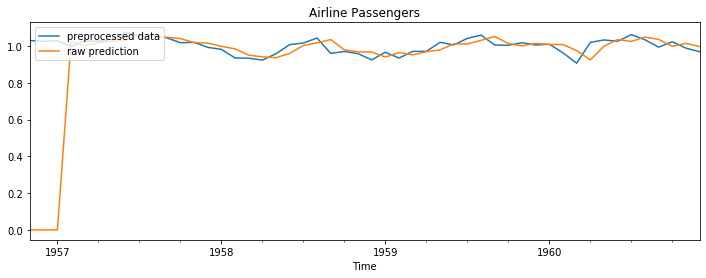

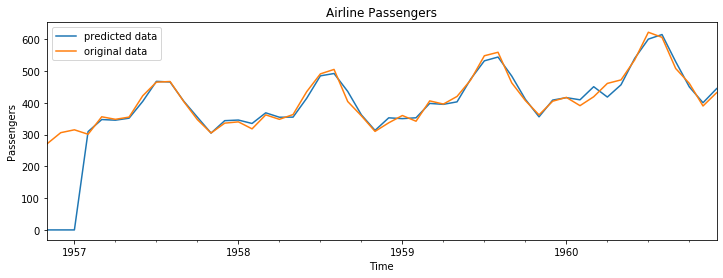

MSE: 5513.8396
MAE: 28.1176
MAPE: 0.0845


In [252]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['preprocessed'].shift(1).values[3:],
    train_df['preprocessed'].shift(2).values[3:],
    train_df['preprocessed'].shift(3).values[3:]
]).T
y = train_df['preprocessed'].values[3:]

reg.fit(X, y)

X_test = np.vstack([
    df['preprocessed'].shift(1).values[3:],
    df['preprocessed'].shift(2).values[3:],
    df['preprocessed'].shift(3).values[3:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[3:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

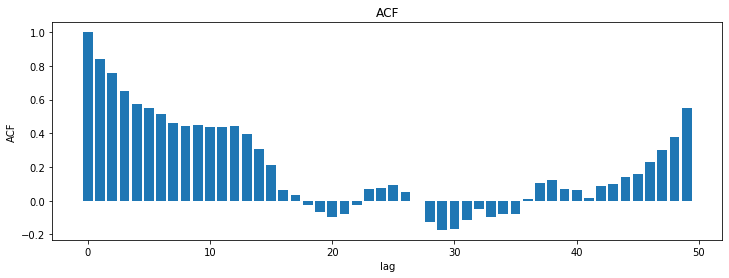

In [253]:
acf = np.zeros(50)
for lag in range(len(acf)):
    acf[lag] = np.corrcoef(train_df['preprocessed'][lag:], train_df['preprocessed'].shift(lag)[lag:])[0, 1]

plt.figure(figsize=(12,4))
plt.bar(range(len(acf)), acf)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.title('ACF')
plt.show()

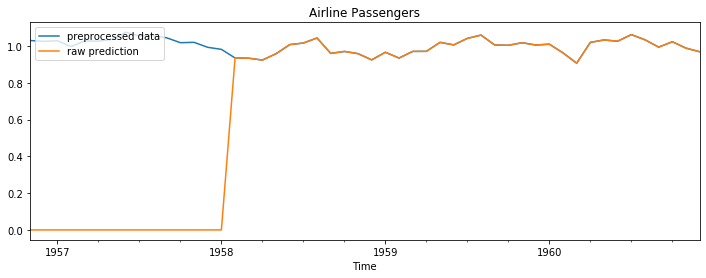

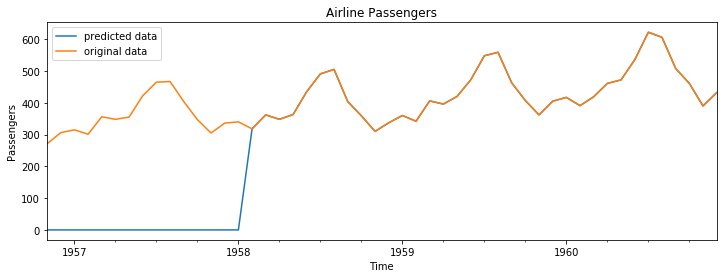

MSE: 38966.2400
MAE: 106.7600
MAPE: 0.3000


In [254]:
reg = linear_model.LinearRegression()

X = np.vstack([train_df['preprocessed'].shift(lag).values[15:] for lag in range(15)]).T
y = train_df['preprocessed'].values[15:]

reg.fit(X, y)

X_test = np.vstack([df['preprocessed'].shift(lag).values[15:] for lag in range(15)]).T
y_predicted = np.zeros(len(df))
y_predicted[15:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

## e) 
Please look at the preprocessed data (i.e. the original data after removing the trend and
the seasonality). What is the variance/standard deviation of the data? Is it approximately
constant or it changes with time? If it changes with time, try to stabilize it and check
whether it improves the prediction accuracy or not.

In [2]:
df = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=['Month'])
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

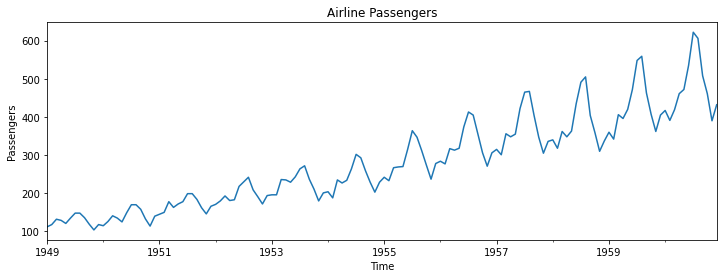

In [3]:
plt.figure(figsize=(12,4))
df['Passengers'].plot()
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.show()

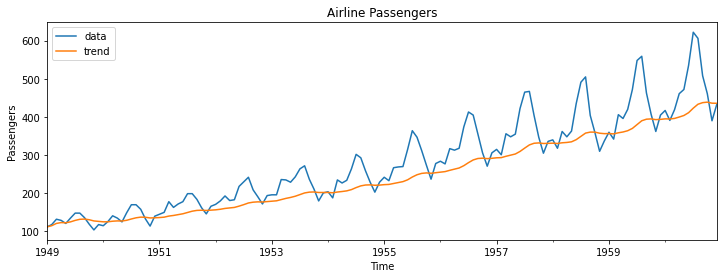

In [4]:
# df['trend'] = df['Passengers'].rolling(window=12, min_periods=1).mean()
# df['trend'] = df['Passengers'].ewm(span=12).mean()
df['trend'] = df['Passengers'].ewm(halflife=12).mean()

plt.figure(figsize=(12,4))
df['Passengers'].plot(label='data')
df['trend'].plot(label='trend')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

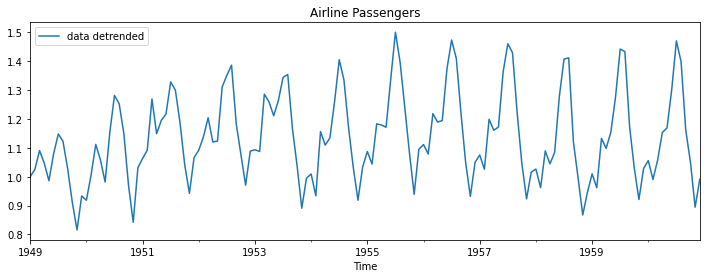

In [5]:
# df['detrended'] = df['Passengers'] - df['trend']
df['detrended'] = df['Passengers'] / df['trend']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

Month
1     1.045050
2     1.028700
3     1.166366
4     1.130612
5     1.131236
6     1.267675
7     1.384267
8     1.352408
9     1.167931
10    1.026496
11    0.904672
12    1.022858
Name: seasonality, dtype: float64

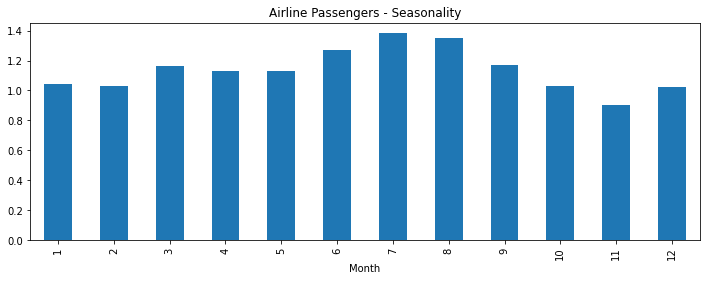

In [6]:
df_seasonality = df['detrended'].groupby(df.index.month).mean().rename('seasonality')
display(df_seasonality)

plt.figure(figsize=(12,4))
df_seasonality.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('')
plt.title('Airline Passengers - Seasonality')
plt.show()

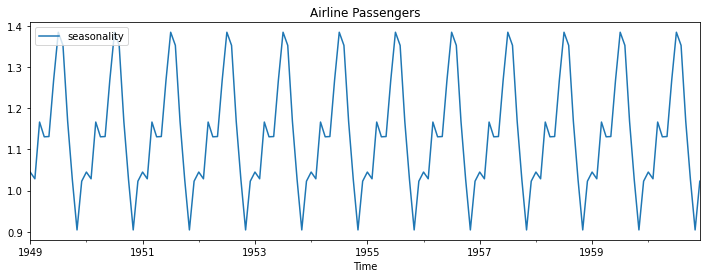

In [7]:
df = df.join(df_seasonality, how='left', on=df.index.month)

plt.figure(figsize=(12,4))
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

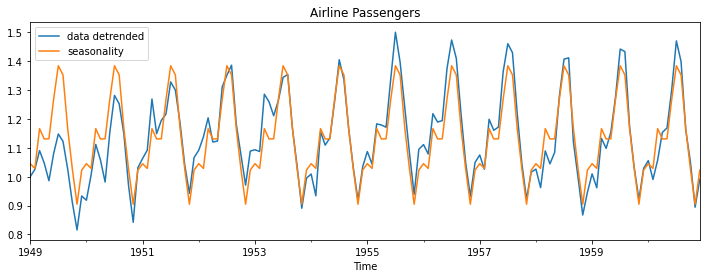

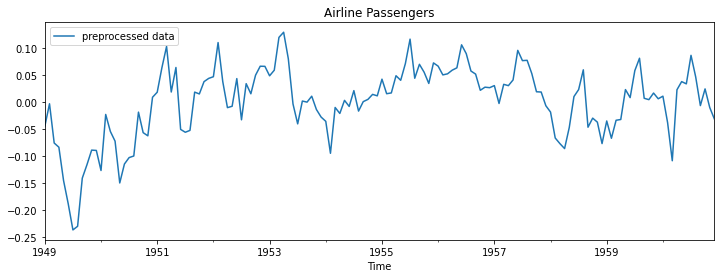

In [8]:
df['preprocessed'] = df['detrended'] - df['seasonality']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

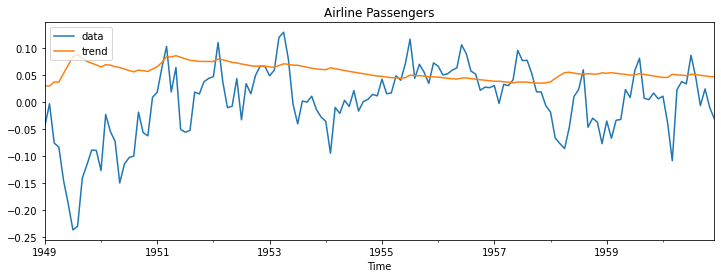

In [9]:
std = df['preprocessed'].ewm(halflife=12).std()
std[0] = std[1]

df['std'] = std

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='data')
df['std'].plot(label='trend')
plt.xlabel('Time')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

In [10]:
df['preprocessed'] = df['preprocessed'] / df['std']

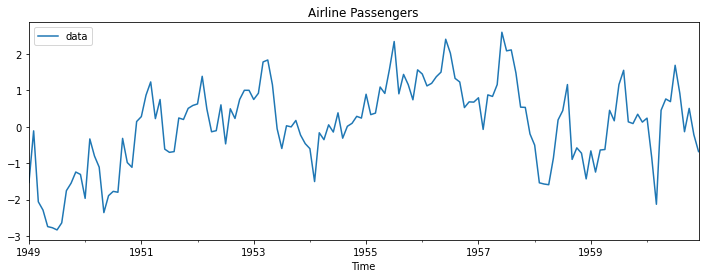

In [11]:
plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='data')
plt.xlabel('Time')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

### Approach 1: Prediction by the global mean

In [12]:
org_df = df.copy()

In [13]:
mask = np.array([i < 144*0.65 for i in range(144)])
train_df = org_df[mask].copy()
df = org_df[~mask].copy()

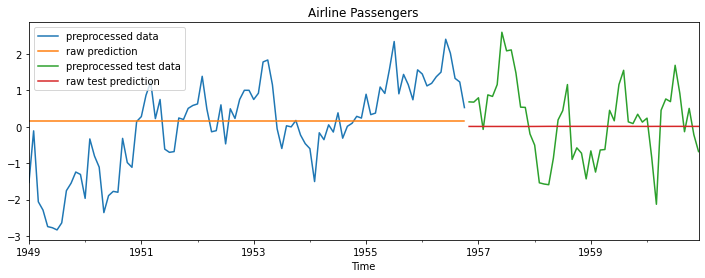

In [18]:
train_df['prediction_raw'] = df['preprocessed'].mean()
df['prediction_raw'] = df['preprocessed'].mean()

df['prediction_raw'] *= df['std']

plt.figure(figsize=(12,4))
train_df['preprocessed'].plot(label='preprocessed data')
train_df['prediction_raw'].plot(label='raw prediction')
df['preprocessed'].plot(label='preprocessed test data')
df['prediction_raw'].plot(label='raw test prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

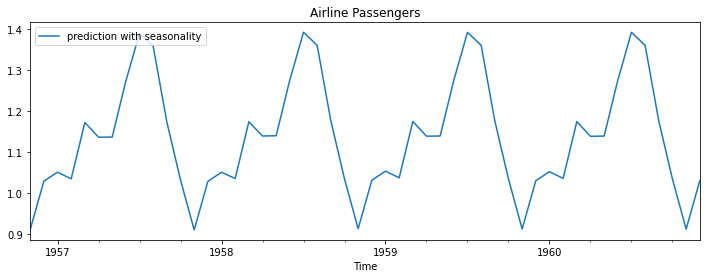

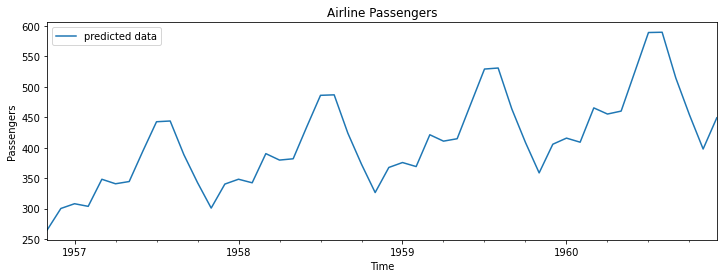

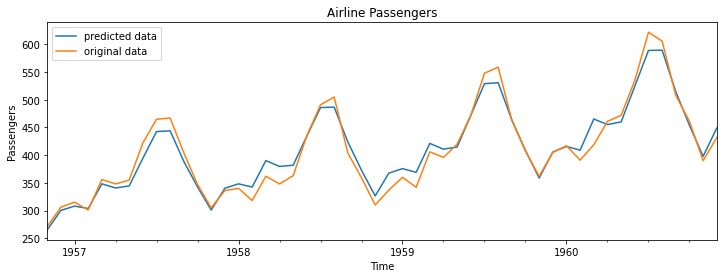

In [19]:
plt.figure(figsize=(12,4))
(df['prediction_raw'] + df['seasonality']).plot(label='prediction with seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
((df['prediction_raw'] + df['seasonality']) * df['trend']).plot(label='predicted data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

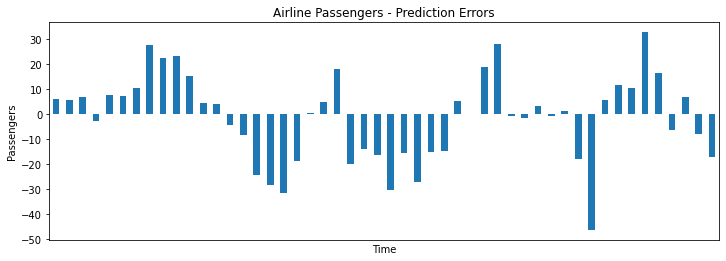

In [20]:
plt.figure(figsize=(12,4))
(df['Passengers'] - df['prediction']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers - Prediction Errors')
plt.show()

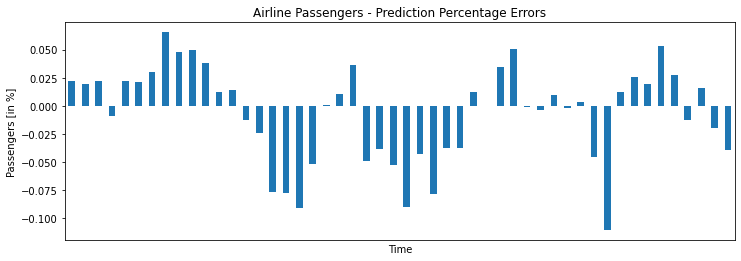

In [21]:
plt.figure(figsize=(12,4))
((df['Passengers'] - df['prediction']) / df['Passengers']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Passengers [in %]')
plt.title('Airline Passengers - Prediction Percentage Errors')
plt.show()

In [22]:
print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

MSE: 291.4921
MAE: 13.5366
MAPE: 0.0336


### Approach 2: Prediction by the previous value

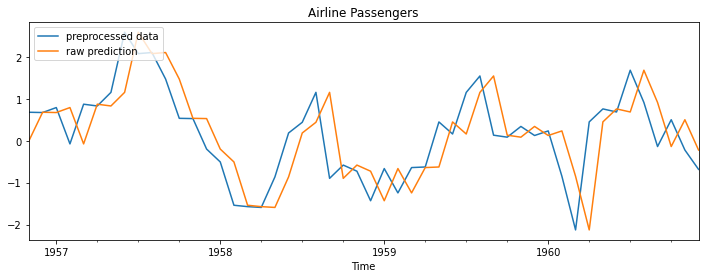

In [24]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0)

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

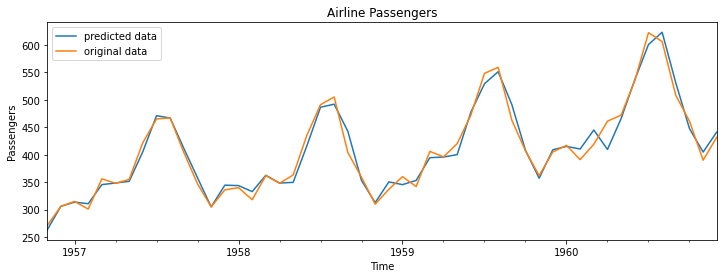

MSE: 222.7919
MAE: 10.9080
MAPE: 0.0261


In [25]:
df['prediction_raw'] *= df['std']
df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 3: Prediction by the moving average

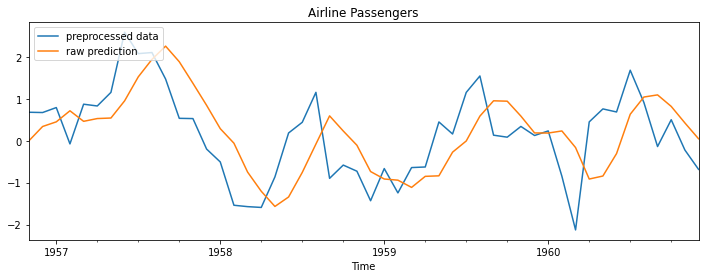

In [26]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=3, min_periods=1).mean()
# df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

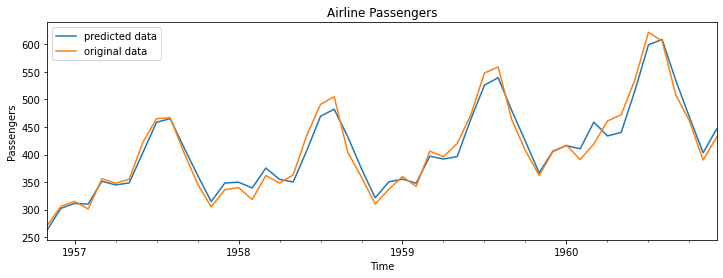

MSE: 264.3351
MAE: 13.5659
MAPE: 0.0328


In [27]:
df['prediction_raw'] *= df['std']
df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 4: Prediction by the linear regression

In [28]:
reg = linear_model.LinearRegression()

X = train_df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y = train_df['preprocessed'].values[1:]

reg.fit(X, y)

y_predicted = np.zeros(len(train_df))
y_predicted[1:] = reg.predict(X)

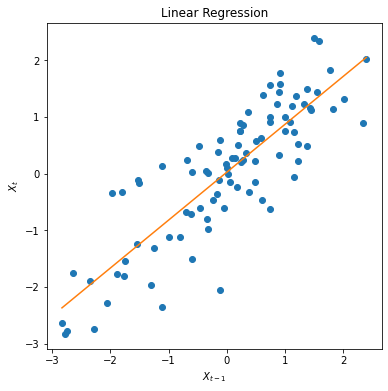

In [29]:
plt.figure(figsize=(6,6))
plt.plot(X[:, 0], y, 'o')
plt.plot([X.min(), X.max()], [reg.coef_[0] * X.min() + reg.intercept_, reg.coef_[0] * X.max() + reg.intercept_], '-')
plt.xlabel('$X_{t-1}$')
plt.ylabel('$X_t$')
plt.title('Linear Regression')
plt.show()

In [30]:
X_test = df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y_predicted = np.zeros(len(df))
y_predicted[1:] = reg.predict(X_test)

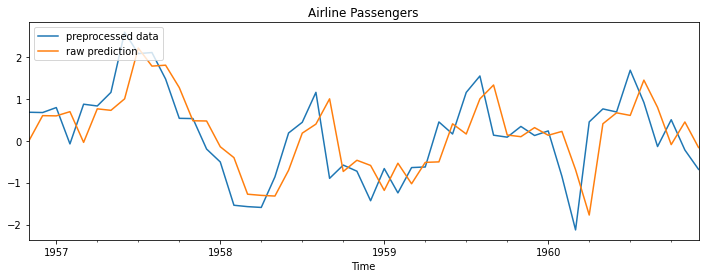

In [31]:
df['prediction_raw'] = y_predicted

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

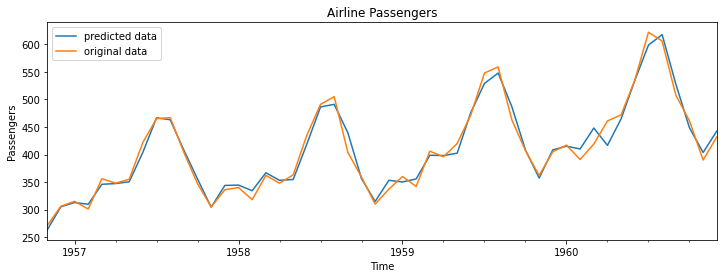

MSE: 194.6760
MAE: 10.4858
MAPE: 0.0253


In [32]:
df['prediction_raw'] *= df['std']
df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

### Approach 4a: Prediction by the multidimensional linear regression

In [33]:
def make_prediction_with_linear_regression(df, y_predicted):
    df['prediction_raw'] = y_predicted

    plt.figure(figsize=(12,4))
    df['preprocessed'].plot(label='preprocessed data')
    df['prediction_raw'].plot(label='raw prediction')
    plt.xlabel('Time')
    plt.ylabel('')
    plt.title('Airline Passengers')
    plt.legend(loc='upper left')
    plt.show()
    
    df['prediction_raw'] *= df['std']

    df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

    plt.figure(figsize=(12,4))
    df['prediction'].plot(label='predicted data')
    df['Passengers'].plot(label='original data')
    plt.xlabel('Time')
    plt.ylabel('Passengers')
    plt.title('Airline Passengers')
    plt.legend(loc='upper left')
    plt.show()

    print('MSE: %0.4f' % ((df['Passengers'] - df['prediction'])**2).mean())
    print('MAE: %0.4f' % (df['Passengers'] - df['prediction']).abs().mean())
    print('MAPE: %0.4f' % ((df['Passengers'] - df['prediction']) / df['Passengers']).abs().mean())

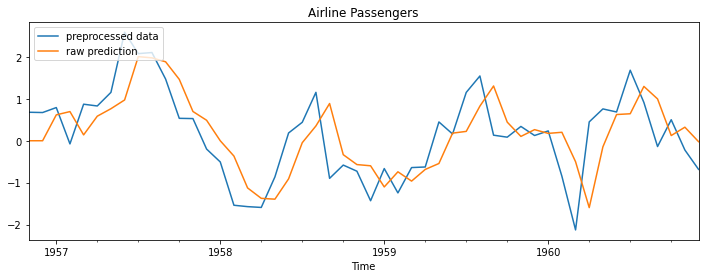

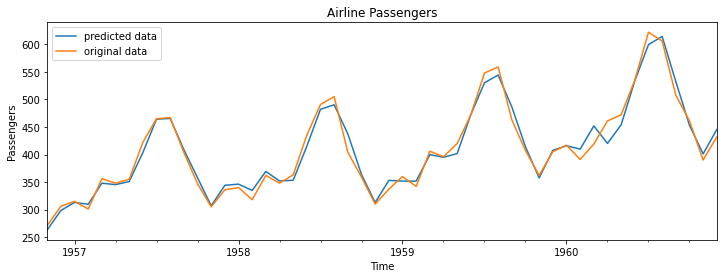

MSE: 201.7405
MAE: 10.9243
MAPE: 0.0264


In [34]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['preprocessed'].shift(1).values[2:],
    train_df['preprocessed'].shift(2).values[2:]
]).T
y = train_df['preprocessed'].values[2:]

reg.fit(X, y)

X_test = np.vstack([
    df['preprocessed'].shift(1).values[2:],
    df['preprocessed'].shift(2).values[2:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[2:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

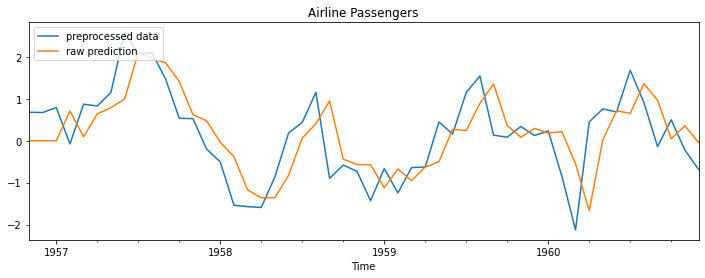

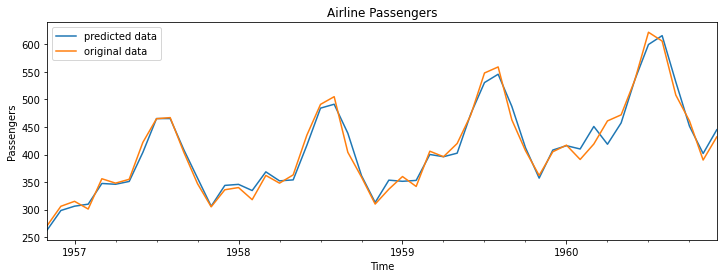

MSE: 200.5123
MAE: 10.8521
MAPE: 0.0263


In [35]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['preprocessed'].shift(1).values[3:],
    train_df['preprocessed'].shift(2).values[3:],
    train_df['preprocessed'].shift(3).values[3:]
]).T
y = train_df['preprocessed'].values[3:]

reg.fit(X, y)

X_test = np.vstack([
    df['preprocessed'].shift(1).values[3:],
    df['preprocessed'].shift(2).values[3:],
    df['preprocessed'].shift(3).values[3:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[3:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

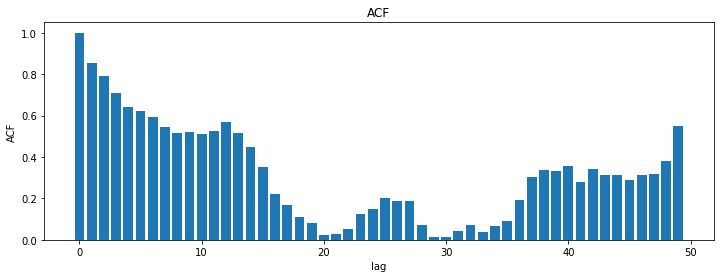

In [36]:
acf = np.zeros(50)
for lag in range(len(acf)):
    acf[lag] = np.corrcoef(train_df['preprocessed'][lag:], train_df['preprocessed'].shift(lag)[lag:])[0, 1]

plt.figure(figsize=(12,4))
plt.bar(range(len(acf)), acf)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.title('ACF')
plt.show()

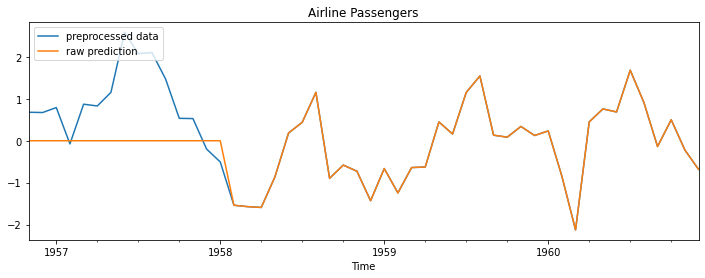

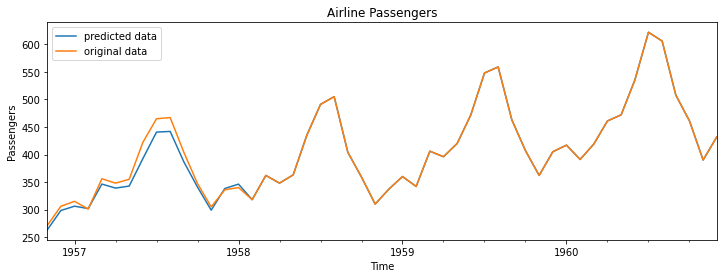

MSE: 60.7229
MAE: 3.4657
MAPE: 0.0091


In [37]:
reg = linear_model.LinearRegression()

X = np.vstack([train_df['preprocessed'].shift(lag).values[15:] for lag in range(15)]).T
y = train_df['preprocessed'].values[15:]

reg.fit(X, y)

X_test = np.vstack([df['preprocessed'].shift(lag).values[15:] for lag in range(15)]).T
y_predicted = np.zeros(len(df))
y_predicted[15:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

## f) 
Please find at least 2 other benchmark time series, e.g. in the UCI Machine Learning
Repository (https://archive.ics.uci.edu/ml/datasets.php - select Time-Series in Data Type
at the left panel), and try to predict them in the similar manner.

In [357]:
df = pd.read_csv('dataset.csv')
df = df[df['SystemCodeNumber']=='Others-CCCPS8'].reset_index()
df = df.drop('LastUpdated', 1)
H = ['8:00', '8:30', '9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30']
hs = [H[i%18] for i in range(len(df))]
df['Hour'] = hs
df

index SystemCodeNumber  Capacity  Occupancy   Hour
0     31781    Others-CCCPS8      1322        445   8:00
1     31782    Others-CCCPS8      1322        478   8:30
2     31783    Others-CCCPS8      1322        518   9:00
3     31784    Others-CCCPS8      1322        590   9:30
4     31785    Others-CCCPS8      1322        657  10:00
...     ...              ...       ...        ...    ...
1307  33088    Others-CCCPS8      1322        974  13:30
1308  33089    Others-CCCPS8      1322        967  14:00
1309  33090    Others-CCCPS8      1322        945  14:30
1310  33091    Others-CCCPS8      1322        870  15:00
1311  33092    Others-CCCPS8      1322        806  15:30

[1312 rows x 5 columns]

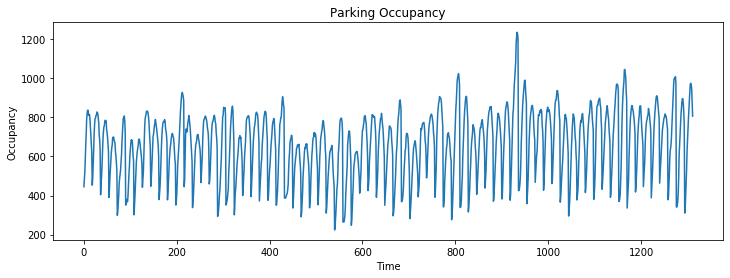

In [296]:
plt.figure(figsize=(12,4))
df['Occupancy'].plot()
plt.xlabel('Time')
plt.ylabel('Occupancy')
plt.title('Parking Occupancy')
plt.show()

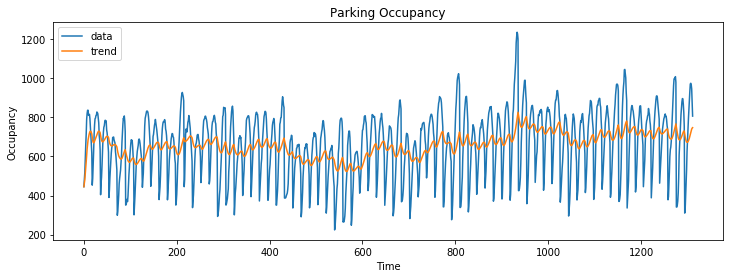

In [315]:
df['trend'] = df['Occupancy'].ewm(halflife=18).mean()

plt.figure(figsize=(12,4))
df['Occupancy'].plot(label='data')
df['trend'].plot(label='trend')
plt.xlabel('Time')
plt.ylabel('Occupancy')
plt.title('Parking Occupancy')
plt.legend(loc='upper left')
plt.show()

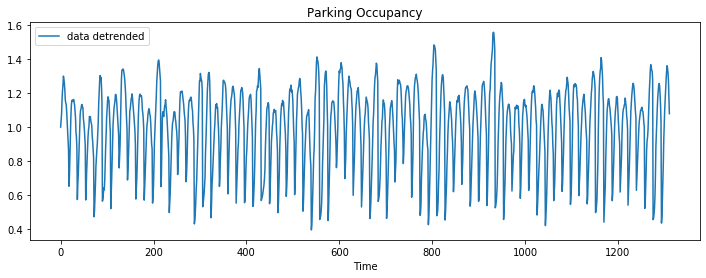

In [316]:
# df['detrended'] = df['Passengers'] - df['trend']
df['detrended'] = df['Occupancy'] / df['trend']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Parking Occupancy')
plt.legend(loc='upper left')
plt.show()

Hour
10:00    0.893271
10:30    0.974375
11:00    1.049530
11:30    1.100397
12:00    1.144399
12:30    1.173562
13:00    1.203320
13:30    1.209608
14:00    1.206433
14:30    1.186795
15:00    1.152837
15:30    1.099291
16:00    1.006842
16:30    0.945827
8:00     0.572013
8:30     0.622647
9:00     0.700029
9:30     0.791968
Name: seasonality, dtype: float64

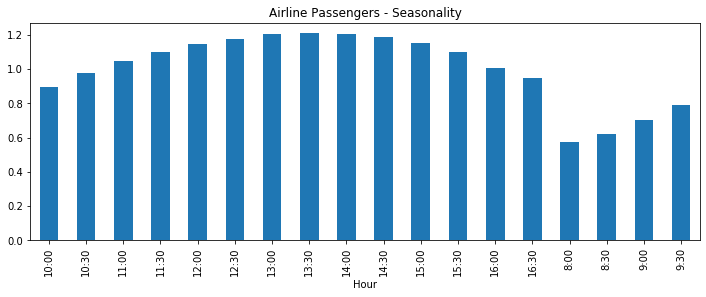

In [320]:
df_seasonality = df['detrended'].groupby(df.Hour).mean().rename('seasonality')
display(df_seasonality)

plt.figure(figsize=(12,4))
df_seasonality.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('')
plt.title('Airline Passengers - Seasonality')
plt.show()

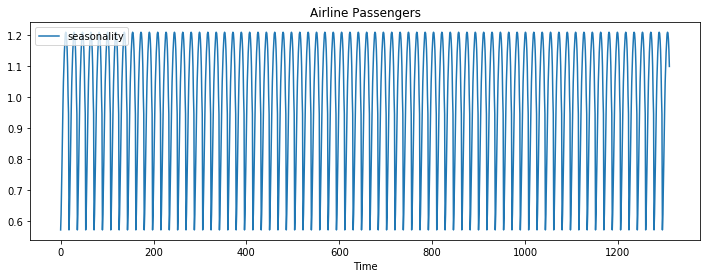

In [321]:
df = df.join(df_seasonality, how='left', on=df.Hour)

plt.figure(figsize=(12,4))
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

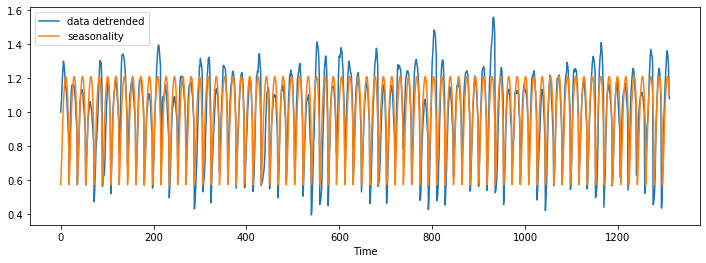

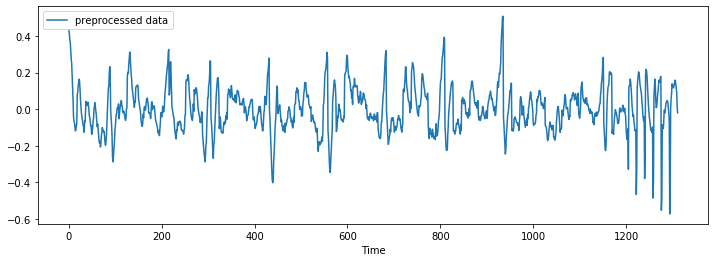

In [322]:
df['preprocessed'] = df['detrended'] - df['seasonality']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

### Approach 1: Prediction by the global mean

In [323]:
org_df = df.copy()

In [324]:
mask = np.array([i < len(org_df)*0.65 for i in range(len(org_df))])
train_df = org_df[mask].copy()
df = org_df[~mask].copy()

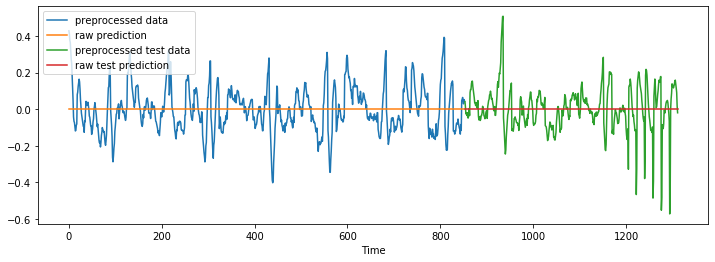

In [325]:
train_df['prediction_raw'] = df['preprocessed'].mean()
df['prediction_raw'] = df['preprocessed'].mean()

plt.figure(figsize=(12,4))
train_df['preprocessed'].plot(label='preprocessed data')
train_df['prediction_raw'].plot(label='raw prediction')
df['preprocessed'].plot(label='preprocessed test data')
df['prediction_raw'].plot(label='raw test prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

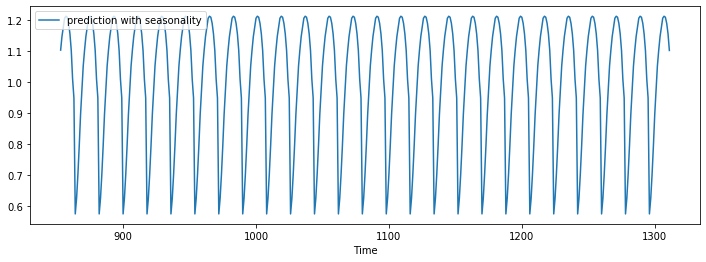

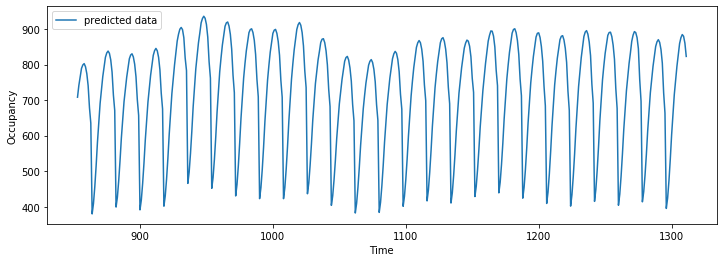

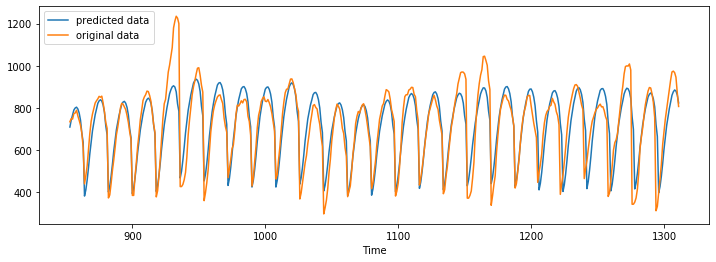

In [326]:
plt.figure(figsize=(12,4))
(df['prediction_raw'] + df['seasonality']).plot(label='prediction with seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
((df['prediction_raw'] + df['seasonality']) * df['trend']).plot(label='predicted data')
plt.xlabel('Time')
plt.ylabel('Occupancy')
plt.legend(loc='upper left')
plt.show()

df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Occupancy'].plot(label='original data')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()

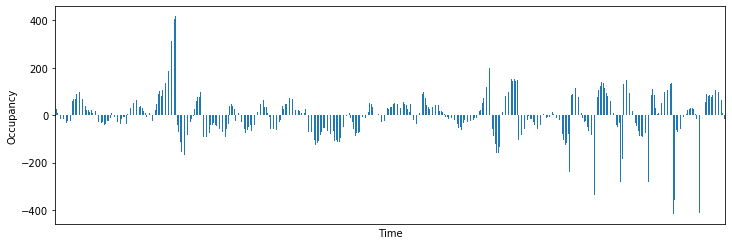

In [327]:
plt.figure(figsize=(12,4))
(df['Occupancy'] - df['prediction']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Occupancy')
plt.show()

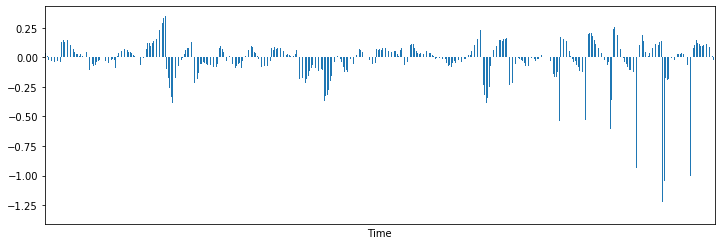

In [328]:
plt.figure(figsize=(12,4))
((df['Occupancy'] - df['prediction']) / df['Occupancy']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.show()

In [330]:
print('MSE: %0.4f' % ((df['Occupancy'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Occupancy'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Occupancy'] - df['prediction']) / df['Occupancy']).abs().mean())

MSE: 8205.0442
MAE: 62.8078
MAPE: 0.1001


### Approach 2: Prediction by the previous value

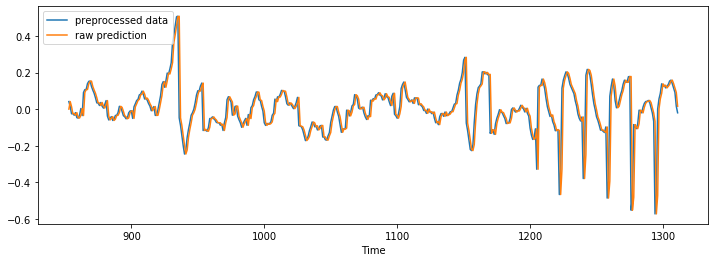

In [331]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0)

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

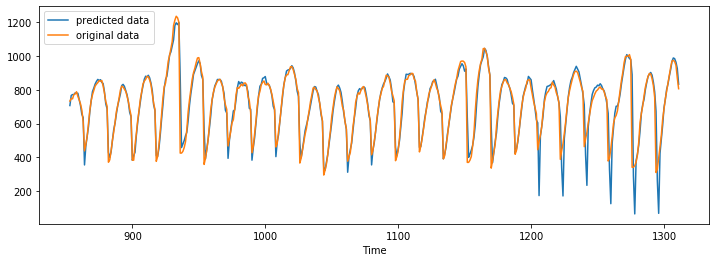

MSE: 4118.6545
MAE: 27.8297
MAPE: 0.0538


In [332]:
df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Occupancy'].plot(label='original data')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Occupancy'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Occupancy'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Occupancy'] - df['prediction']) / df['Occupancy']).abs().mean())

### Approach 3: Prediction by the moving average

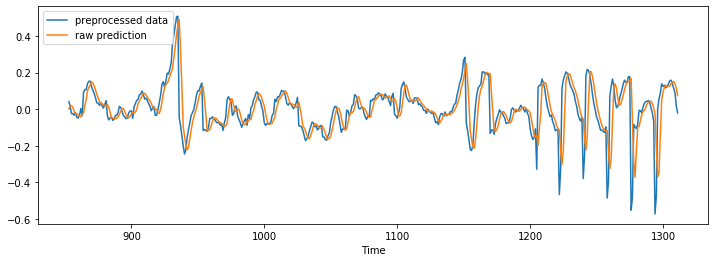

In [333]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=3, min_periods=1).mean()
# df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

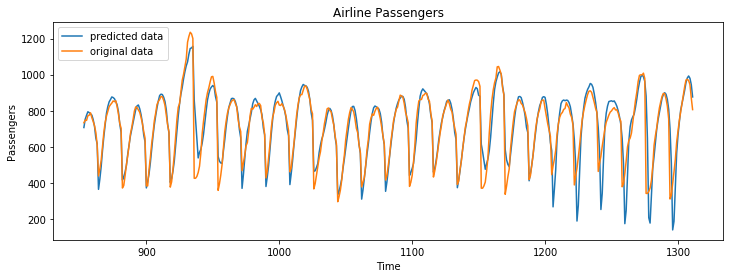

MSE: 6003.5923
MAE: 43.5469
MAPE: 0.0809


In [334]:
df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Occupancy'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Occupancy'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Occupancy'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Occupancy'] - df['prediction']) / df['Occupancy']).abs().mean())

### Approach 4: Prediction by the linear regression

In [335]:
reg = linear_model.LinearRegression()

X = train_df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y = train_df['preprocessed'].values[1:]

reg.fit(X, y)

y_predicted = np.zeros(len(train_df))
y_predicted[1:] = reg.predict(X)

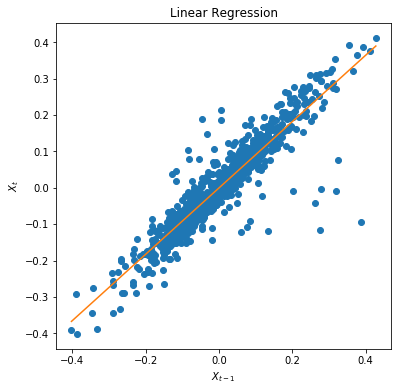

In [336]:
plt.figure(figsize=(6,6))
plt.plot(X[:, 0], y, 'o')
plt.plot([X.min(), X.max()], [reg.coef_[0] * X.min() + reg.intercept_, reg.coef_[0] * X.max() + reg.intercept_], '-')
plt.xlabel('$X_{t-1}$')
plt.ylabel('$X_t$')
plt.title('Linear Regression')
plt.show()

In [337]:
X_test = df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y_predicted = np.zeros(len(df))
y_predicted[1:] = reg.predict(X_test)

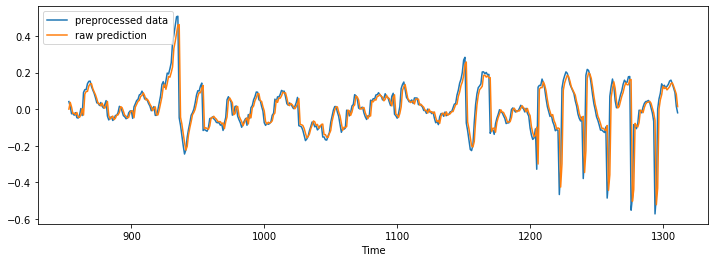

In [338]:
df['prediction_raw'] = y_predicted

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

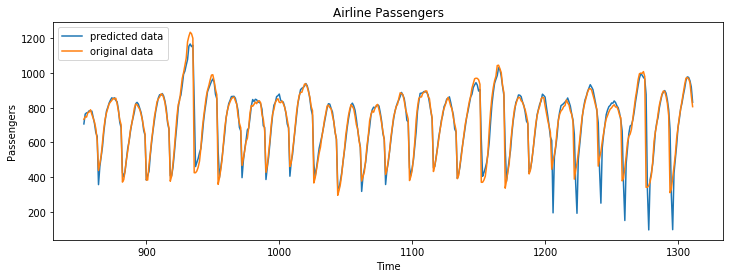

MSE: 3821.2176
MAE: 27.6930
MAPE: 0.0527


In [339]:
df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Occupancy'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Occupancy'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Occupancy'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Occupancy'] - df['prediction']) / df['Occupancy']).abs().mean())

### Approach 4a: Prediction by the multidimensional linear regression

In [340]:
def make_prediction_with_linear_regression(df, y_predicted):
    df['prediction_raw'] = y_predicted

    plt.figure(figsize=(12,4))
    df['preprocessed'].plot(label='preprocessed data')
    df['prediction_raw'].plot(label='raw prediction')
    plt.xlabel('Time')
    plt.ylabel('')
    plt.legend(loc='upper left')
    plt.show()

    df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

    plt.figure(figsize=(12,4))
    df['prediction'].plot(label='predicted data')
    df['Occupancy'].plot(label='original data')
    plt.xlabel('Time')
    plt.legend(loc='upper left')
    plt.show()

    print('MSE: %0.4f' % ((df['Occupancy'] - df['prediction'])**2).mean())
    print('MAE: %0.4f' % (df['Occupancy'] - df['prediction']).abs().mean())
    print('MAPE: %0.4f' % ((df['Occupancy'] - df['prediction']) / df['Occupancy']).abs().mean())

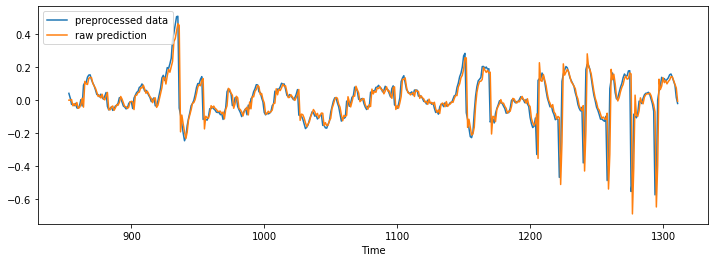

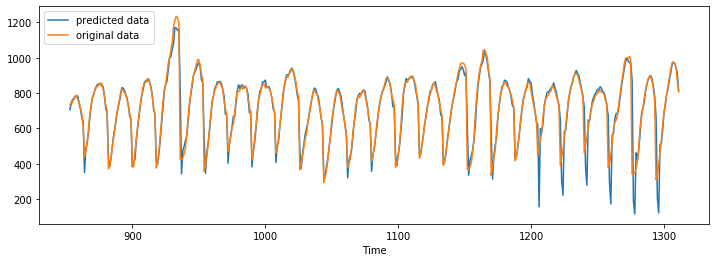

MSE: 3847.8047
MAE: 27.6291
MAPE: 0.0544


In [341]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['preprocessed'].shift(1).values[2:],
    train_df['preprocessed'].shift(2).values[2:]
]).T
y = train_df['preprocessed'].values[2:]

reg.fit(X, y)

X_test = np.vstack([
    df['preprocessed'].shift(1).values[2:],
    df['preprocessed'].shift(2).values[2:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[2:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

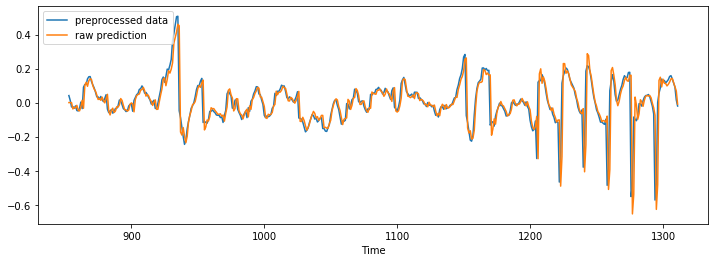

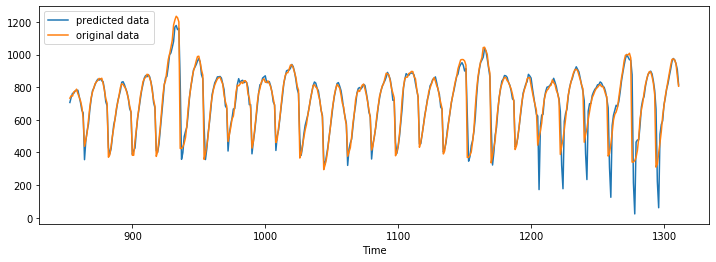

MSE: 4143.0770
MAE: 27.9737
MAPE: 0.0554


In [342]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['preprocessed'].shift(1).values[3:],
    train_df['preprocessed'].shift(2).values[3:],
    train_df['preprocessed'].shift(3).values[3:]
]).T
y = train_df['preprocessed'].values[3:]

reg.fit(X, y)

X_test = np.vstack([
    df['preprocessed'].shift(1).values[3:],
    df['preprocessed'].shift(2).values[3:],
    df['preprocessed'].shift(3).values[3:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[3:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

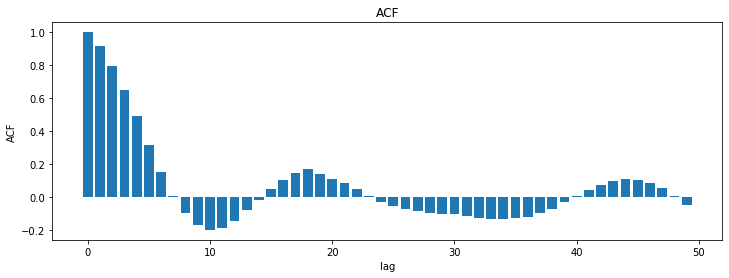

In [343]:
acf = np.zeros(50)
for lag in range(len(acf)):
    acf[lag] = np.corrcoef(train_df['preprocessed'][lag:], train_df['preprocessed'].shift(lag)[lag:])[0, 1]

plt.figure(figsize=(12,4))
plt.bar(range(len(acf)), acf)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.title('ACF')
plt.show()

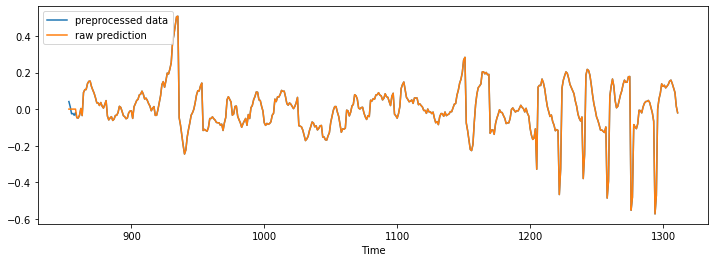

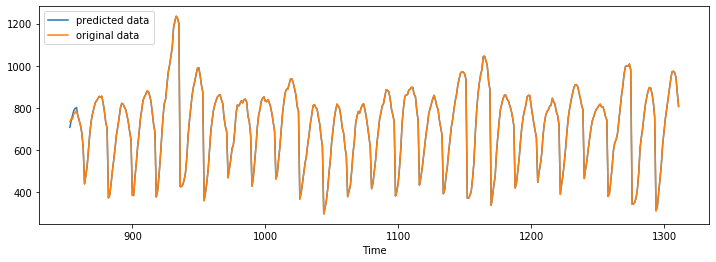

MSE: 4.2495
MAE: 0.2230
MAPE: 0.0003


In [347]:
reg = linear_model.LinearRegression()

X = np.vstack([train_df['preprocessed'].shift(lag).values[6:] for lag in range(6)]).T
y = train_df['preprocessed'].values[6:]

reg.fit(X, y)

X_test = np.vstack([df['preprocessed'].shift(lag).values[6:] for lag in range(6)]).T
y_predicted = np.zeros(len(df))
y_predicted[6:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

### 2nd dataset

In [470]:
df = pd.read_csv('ShanghaiPM20100101_20151231.csv')
df = df[df['year'] == 2013]
df = df[df['month'] > 2]
df = df[df['month'] < 7]
df = df.fillna(method='ffill')
df.head()

No  year  month  day  hour  season  PM_Jingan  PM_US Post  PM_Xuhui  \
27720  27721  2013      3    1     0       1        NaN        61.0       NaN   
27721  27722  2013      3    1     1       1        NaN        62.0       NaN   
27722  27723  2013      3    1     2       1        NaN        74.0       NaN   
27723  27724  2013      3    1     3       1        NaN        98.0       NaN   
27724  27725  2013      3    1     4       1        NaN       135.0       NaN   

       DEWP   HUMI    PRES  TEMP cbwd   Iws  precipitation  Iprec  
27720  10.0  76.84  1011.0  14.0   NE   2.0            0.0    0.0  
27721  10.0  76.84  1011.0  14.0   NE   6.0            6.5    6.5  
27722  12.0  93.65  1012.0  13.0   NE   9.0            0.0    0.0  
27723  10.0  87.57  1012.0  12.0   NE  19.0            3.3    3.3  
27724   8.0  93.45  1014.0   9.0   NE  29.0            3.7    7.0

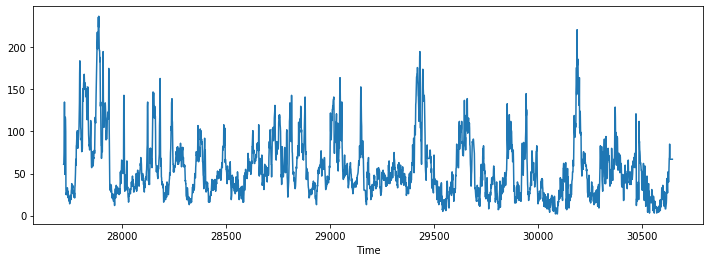

In [471]:
plt.figure(figsize=(12,4))
df['PM_US Post'].plot()
plt.xlabel('Time')
plt.show()

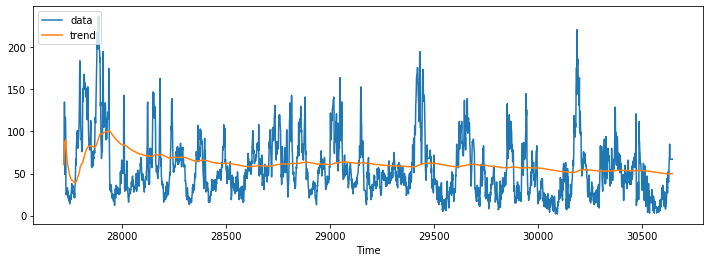

In [472]:
# df['trend'] = df['Passengers'].rolling(window=12, min_periods=1).mean()
# df['trend'] = df['Passengers'].ewm(span=12).mean()
df['trend'] = df['PM_US Post'].ewm(halflife=30*24).mean()

plt.figure(figsize=(12,4))
df['PM_US Post'].plot(label='data')
df['trend'].plot(label='trend')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()

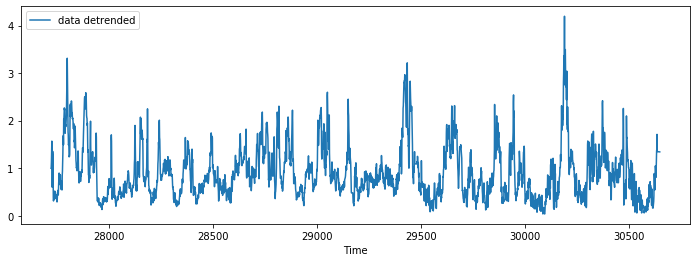

In [473]:
# df['detrended'] = df['Passengers'] - df['trend']
df['detrended'] = df['PM_US Post'] / df['trend']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

day
1     0.908302
2     0.757169
3     0.945305
4     0.964048
5     0.884088
6     0.709208
7     0.964821
8     0.965340
9     0.925864
10    0.979401
11    1.481420
12    1.405082
13    1.011598
14    0.630960
15    0.673369
16    0.672195
17    0.980094
18    1.008042
19    1.172510
20    1.043398
21    0.869924
22    0.880113
23    1.005285
24    1.097748
25    0.810215
26    0.537989
27    0.560141
28    0.749727
29    1.021461
30    0.708302
31    0.650387
Name: seasonality, dtype: float64

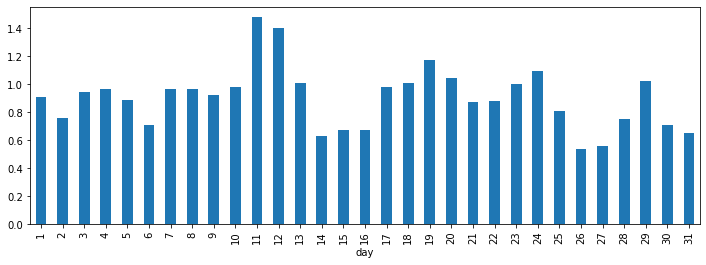

In [474]:
df_seasonality = df['detrended'].groupby(df.day).mean().rename('seasonality')
display(df_seasonality)

plt.figure(figsize=(12,4))
df_seasonality.plot(kind='bar')
plt.ylabel('')
plt.show()

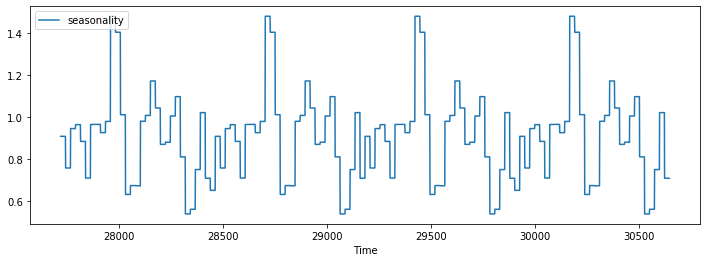

In [475]:
df = df.join(df_seasonality, how='left', on=df.day)

plt.figure(figsize=(12,4))
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

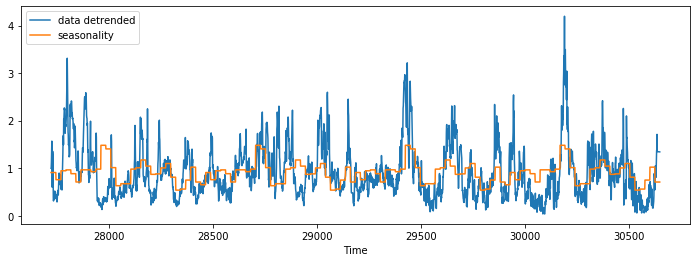

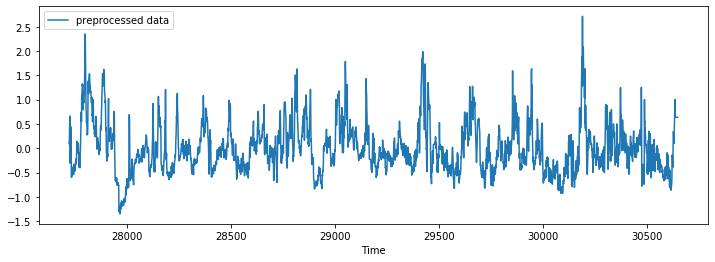

In [476]:
df['preprocessed'] = df['detrended'] - df['seasonality']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

### Approach 1: Prediction by the global mean

In [477]:
org_df = df.copy()

In [478]:
mask = np.array([i < len(org_df)*0.65 for i in range(len(org_df))])
train_df = org_df[mask].copy()
df = org_df[~mask].copy()

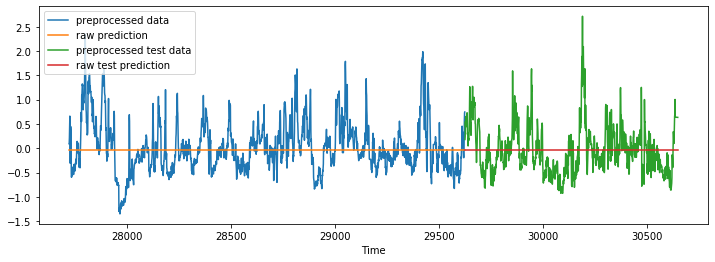

In [479]:
train_df['prediction_raw'] = df['preprocessed'].mean()
df['prediction_raw'] = df['preprocessed'].mean()

plt.figure(figsize=(12,4))
train_df['preprocessed'].plot(label='preprocessed data')
train_df['prediction_raw'].plot(label='raw prediction')
df['preprocessed'].plot(label='preprocessed test data')
df['prediction_raw'].plot(label='raw test prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

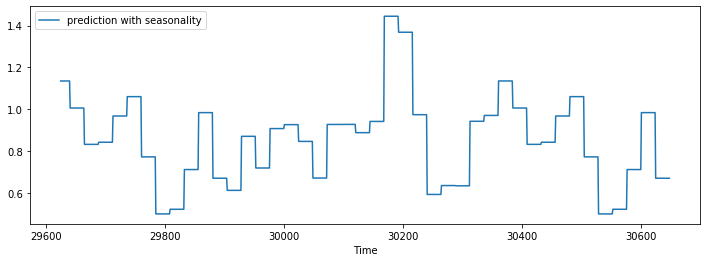

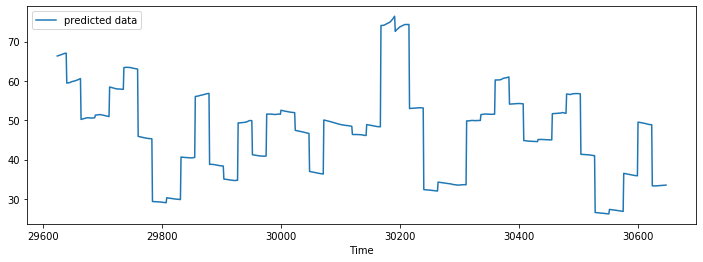

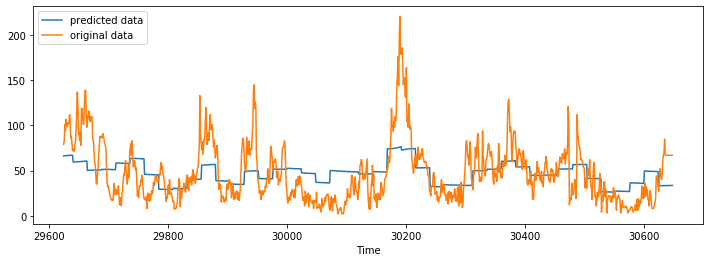

In [480]:
plt.figure(figsize=(12,4))
(df['prediction_raw'] + df['seasonality']).plot(label='prediction with seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
((df['prediction_raw'] + df['seasonality']) * df['trend']).plot(label='predicted data')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()

df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['PM_US Post'].plot(label='original data')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()

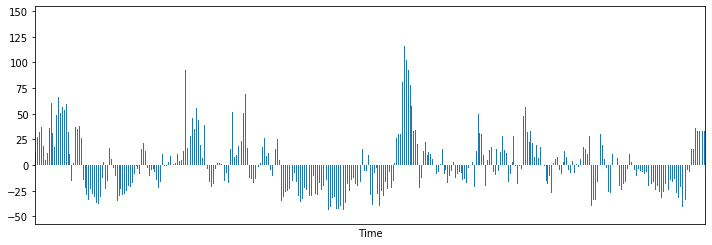

In [481]:
plt.figure(figsize=(12,4))
(df['PM_US Post'] - df['prediction']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.show()

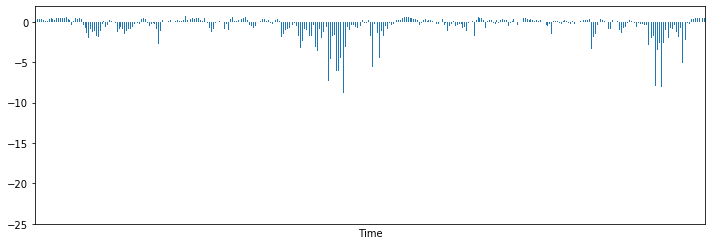

In [482]:
plt.figure(figsize=(12,4))
((df['PM_US Post'] - df['prediction']) / df['PM_US Post']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.show()

In [483]:
print('MSE: %0.4f' % ((df['PM_US Post'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['PM_US Post'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['PM_US Post'] - df['prediction']) / df['PM_US Post']).abs().mean())

MSE: 746.7712
MAE: 21.0275
MAPE: 0.8932


### Approach 2: Prediction by the previous value

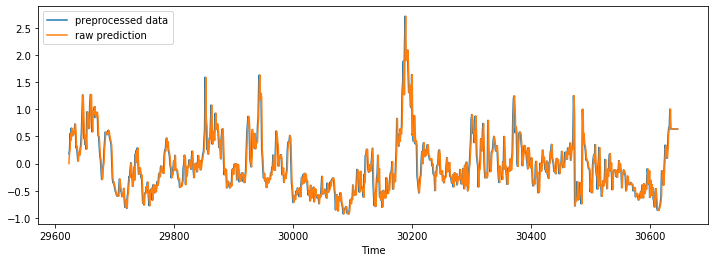

In [484]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0)

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()

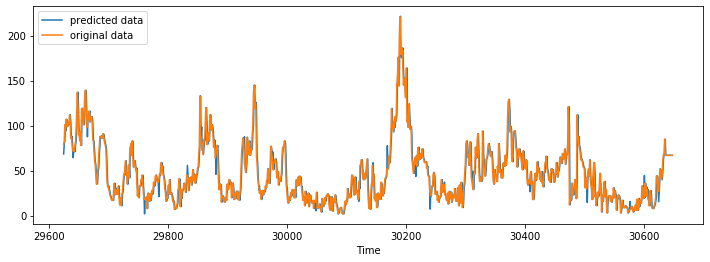

MSE: 137.0157
MAE: 8.1921
MAPE: 0.2605


In [485]:
df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['PM_US Post'].plot(label='original data')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['PM_US Post'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['PM_US Post'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['PM_US Post'] - df['prediction']) / df['PM_US Post']).abs().mean())

### Approach 3: Prediction by the moving average

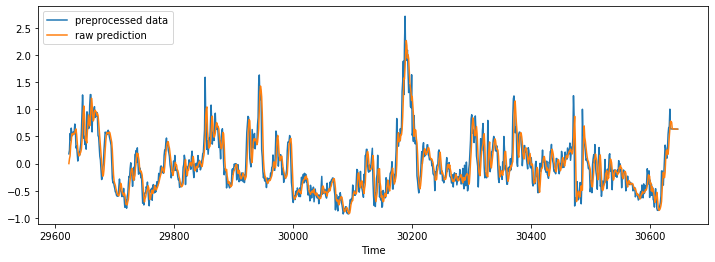

In [486]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=3, min_periods=1).mean()
# df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()

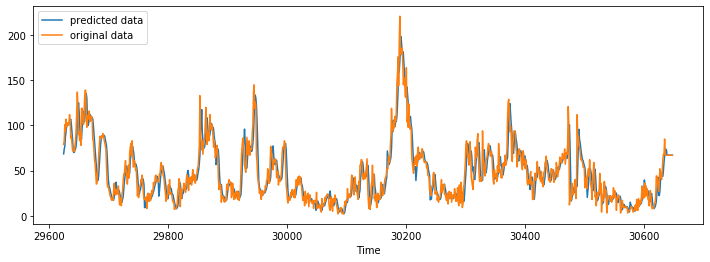

MSE: 188.5501
MAE: 9.7649
MAPE: 0.3071


In [487]:
df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['PM_US Post'].plot(label='original data')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['PM_US Post'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['PM_US Post'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['PM_US Post'] - df['prediction']) / df['PM_US Post']).abs().mean())

### Approach 4: Prediction by the linear regression

In [488]:
reg = linear_model.LinearRegression()

X = train_df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y = train_df['preprocessed'].values[1:]

reg.fit(X, y)

y_predicted = np.zeros(len(train_df))
y_predicted[1:] = reg.predict(X)

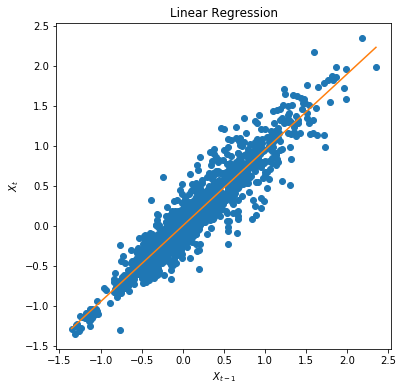

In [489]:
plt.figure(figsize=(6,6))
plt.plot(X[:, 0], y, 'o')
plt.plot([X.min(), X.max()], [reg.coef_[0] * X.min() + reg.intercept_, reg.coef_[0] * X.max() + reg.intercept_], '-')
plt.xlabel('$X_{t-1}$')
plt.ylabel('$X_t$')
plt.title('Linear Regression')
plt.show()

In [490]:
X_test = df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y_predicted = np.zeros(len(df))
y_predicted[1:] = reg.predict(X_test)

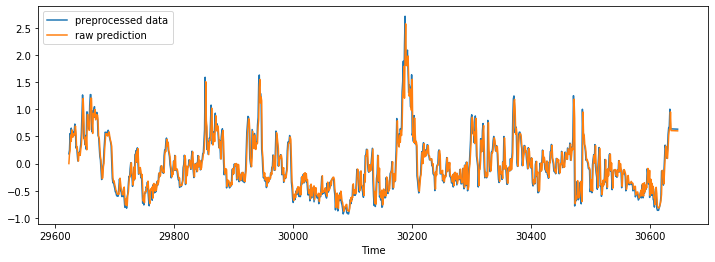

In [491]:
df['prediction_raw'] = y_predicted

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()

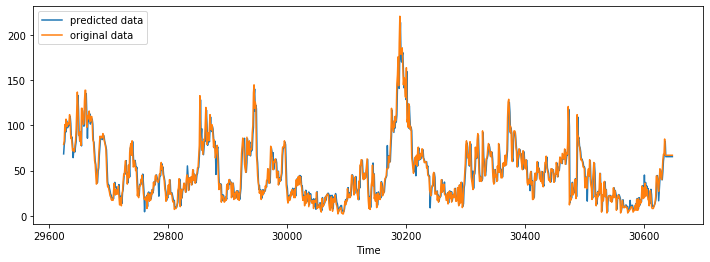

MSE: 131.9574
MAE: 8.1211
MAPE: 0.2699


In [492]:
df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['PM_US Post'].plot(label='original data')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['PM_US Post'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['PM_US Post'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['PM_US Post'] - df['prediction']) / df['PM_US Post']).abs().mean())

### Approach 4a: Prediction by the multidimensional linear regression

In [493]:
def make_prediction_with_linear_regression(df, y_predicted):
    df['prediction_raw'] = y_predicted

    plt.figure(figsize=(12,4))
    df['preprocessed'].plot(label='preprocessed data')
    df['prediction_raw'].plot(label='raw prediction')
    plt.xlabel('Time')
    plt.ylabel('')
    plt.title('Airline Passengers')
    plt.legend(loc='upper left')
    plt.show()

    df['prediction'] = (df['prediction_raw'] + df['seasonality']) * df['trend']

    plt.figure(figsize=(12,4))
    df['prediction'].plot(label='predicted data')
    df['PM_US Post'].plot(label='original data')
    plt.xlabel('Time')
    plt.legend(loc='upper left')
    plt.show()

    print('MSE: %0.4f' % ((df['PM_US Post'] - df['prediction'])**2).mean())
    print('MAE: %0.4f' % (df['PM_US Post'] - df['prediction']).abs().mean())
    print('MAPE: %0.4f' % ((df['PM_US Post'] - df['prediction']) / df['PM_US Post']).abs().mean())

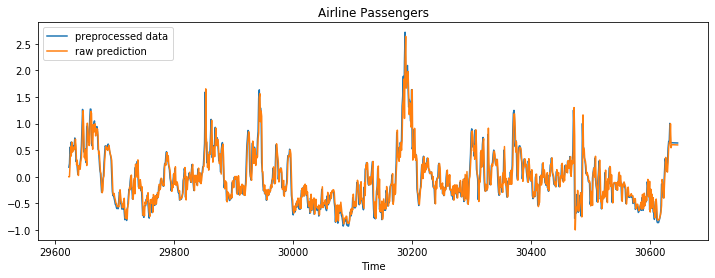

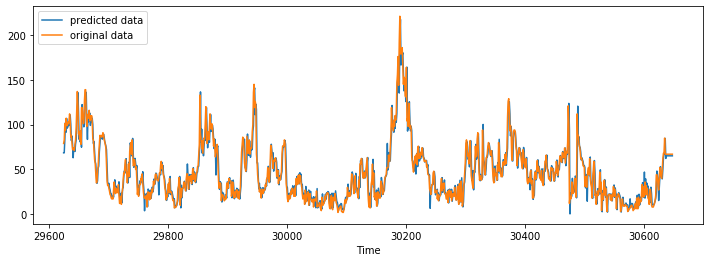

MSE: 137.2960
MAE: 8.3386
MAPE: 0.2782


In [494]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['preprocessed'].shift(1).values[2:],
    train_df['preprocessed'].shift(2).values[2:]
]).T
y = train_df['preprocessed'].values[2:]

reg.fit(X, y)

X_test = np.vstack([
    df['preprocessed'].shift(1).values[2:],
    df['preprocessed'].shift(2).values[2:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[2:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

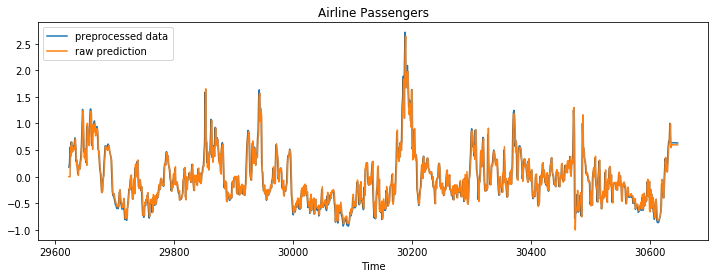

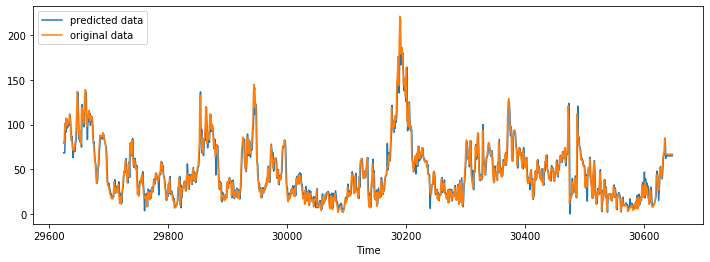

MSE: 137.9905
MAE: 8.3481
MAPE: 0.2782


In [495]:
reg = linear_model.LinearRegression()

X = np.vstack([
    train_df['preprocessed'].shift(1).values[3:],
    train_df['preprocessed'].shift(2).values[3:],
    train_df['preprocessed'].shift(3).values[3:]
]).T
y = train_df['preprocessed'].values[3:]

reg.fit(X, y)

X_test = np.vstack([
    df['preprocessed'].shift(1).values[3:],
    df['preprocessed'].shift(2).values[3:],
    df['preprocessed'].shift(3).values[3:]
]).T

y_predicted = np.zeros(len(df))
y_predicted[3:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

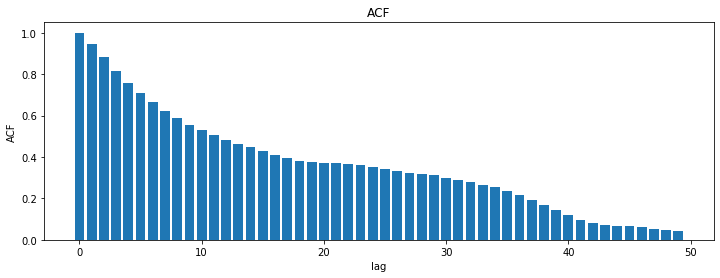

In [496]:
acf = np.zeros(50)
for lag in range(len(acf)):
    acf[lag] = np.corrcoef(train_df['preprocessed'][lag:], train_df['preprocessed'].shift(lag)[lag:])[0, 1]

plt.figure(figsize=(12,4))
plt.bar(range(len(acf)), acf)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.title('ACF')
plt.show()

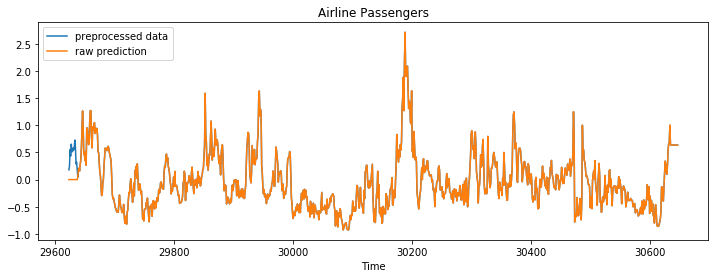

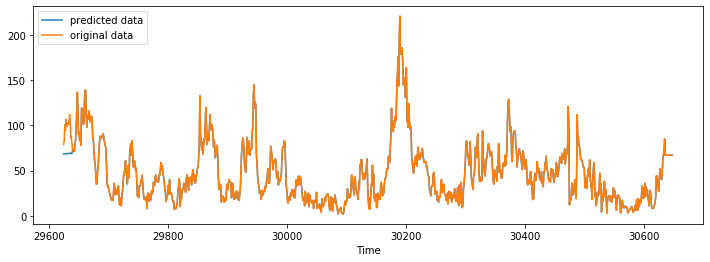

MSE: 12.2427
MAE: 0.3973
MAPE: 0.0040


In [497]:
reg = linear_model.LinearRegression()

X = np.vstack([train_df['preprocessed'].shift(lag).values[15:] for lag in range(15)]).T
y = train_df['preprocessed'].values[15:]

reg.fit(X, y)

X_test = np.vstack([df['preprocessed'].shift(lag).values[15:] for lag in range(15)]).T
y_predicted = np.zeros(len(df))
y_predicted[15:] = reg.predict(X_test)

make_prediction_with_linear_regression(df, y_predicted)

# Assignment 3. (4 points)
Please read the notebook Bid and Ask Reconstruction attached to the lecture notes.
Please propose an approach to reconstruct bid and ask data from transaction data and
validate the approach on some selected periods.

HINT: you may start with inventing moving k-means

### Input
Input data
In the stock market with the order driven trading mechanism, when a trader submits a buy (or sell) order to the stock market, his order is matched with other registered orders and if there is an opposite order - someone declares to sell (or buy) the required number of stocks at the required price - the transaction is executed, otherwise his order is registered in the order book and waits for new incoming orders. Bid is the price of the best buy order registered in the order book and ask is the price of the best sell order registered in the order book. Assuming some simplification, transaction prices should be usually equal either to bid or to ask (in practice, some large orders are splitted and matched partially to a number of opposite orders, so the final price may differ from bid and ask).

Input data contains the transaction data as well as the bid and ask data for a selected stock from the London Stock Exchange over a selected period.

In [38]:
df_bid_ask = pd.read_csv('bid_ask.csv', index_col='timestamp', parse_dates=['timestamp'])
display(df_bid_ask)

bid     ask
timestamp                          
2013-09-02 08:30:00  2994.5  2995.5
2013-09-02 08:31:00  2997.0  2998.0
2013-09-02 08:32:00  2996.5  2998.0
2013-09-02 08:33:00  2996.0  2998.0
2013-09-02 08:34:00  2997.0  2998.5
...                     ...     ...
2013-09-13 15:56:00  3118.5  3119.0
2013-09-13 15:57:00  3119.0  3119.5
2013-09-13 15:58:00  3122.0  3122.5
2013-09-13 15:59:00  3122.5  3123.5
2013-09-13 16:00:00  3123.5  3124.0

[4510 rows x 2 columns]

In [39]:
df_transaction = pd.read_csv('transaction.csv', index_col='timestamp', parse_dates=['timestamp'])
display(df_transaction)

transaction
timestamp                       
2013-09-02 08:32:00       2998.0
2013-09-02 08:33:00       2998.0
2013-09-02 08:34:00       2998.5
2013-09-02 08:35:00       2999.0
2013-09-02 08:38:00       3020.0
...                          ...
2013-09-13 15:54:00       3119.0
2013-09-13 15:55:00       3118.5
2013-09-13 15:56:00       3118.5
2013-09-13 15:57:00       3119.0
2013-09-13 16:00:00       3123.5

[2221 rows x 1 columns]

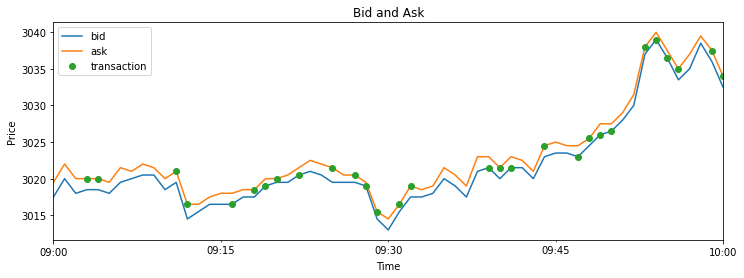

In [40]:
plt.figure(figsize=(12, 4))
df_bid_ask['bid']['2013-09-02 9:00':'2013-09-02 10:00'].plot(label='bid')
df_bid_ask['ask']['2013-09-02 9:00':'2013-09-02 10:00'].plot(label='ask')
df_transaction['transaction']['2013-09-02 9:00':'2013-09-02 10:00'].plot(label='transaction', style='o')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bid and Ask')
plt.legend(loc='upper left')
plt.show()

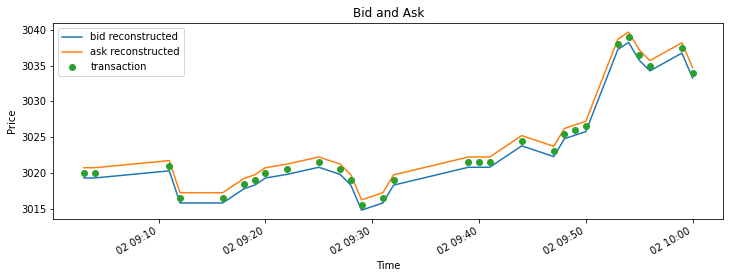

In [41]:
selection = df_transaction['2013-09-02 9:00':'2013-09-02 10:00'].index.values
df_bid_ask_reconstructed = pd.DataFrame(np.zeros((len(selection), 2)), index=selection, columns=['bid', 'ask'])
df_bid_ask_reconstructed['bid'] = df_transaction.loc[selection]['transaction'] - 0.1 * df_transaction.loc[selection]['transaction'].std()
df_bid_ask_reconstructed['ask'] = df_transaction.loc[selection]['transaction'] + 0.1 * df_transaction.loc[selection]['transaction'].std()

plt.figure(figsize=(12, 4))
df_bid_ask_reconstructed['bid'].plot(label='bid reconstructed')
df_bid_ask_reconstructed['ask'].plot(label='ask reconstructed')
# df_bid_ask['bid'].loc[selection].plot(label='bid original', color='#808080')
# df_bid_ask['ask'].loc[selection].plot(label='ask original', color='#808080')
df_transaction['transaction'].loc[selection].plot(label='transaction', style='o')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bid and Ask')
plt.legend(loc='upper left')
plt.show()

In [42]:
from sklearn.cluster import KMeans

In [133]:
def f(df, N):
    asks, bids = [None for i in range(N)], [None for i in range(N)]
    for i in range(N,len(df)):
        X = df[i-N:i].values.reshape(-1,1)
        kmeans = KMeans(n_clusters=2).fit(X)
        ask, bid = max(kmeans.cluster_centers_)[0], min(kmeans.cluster_centers_)[0]
        asks.append(ask)
        bids.append(bid)
    return asks, bids

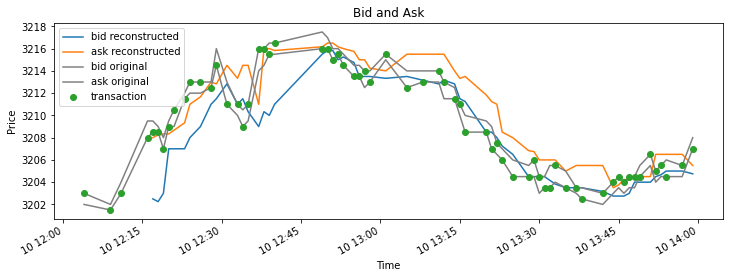

In [151]:
TIME0 = '2013-09-10 12:00'
TIME1 = '2013-09-10 14:00'
selection = df_transaction['transaction'][TIME0:TIME1]

N = 4
ask, bid = f(selection, N)

df_bid_ask_reconstructed = pd.DataFrame(selection)
df_bid_ask_reconstructed['bid'] = bid
df_bid_ask_reconstructed['ask'] = ask

selection = df_transaction[TIME0:TIME1].index.values
plt.figure(figsize=(12, 4))
df_bid_ask_reconstructed['bid'].plot(label='bid reconstructed')
df_bid_ask_reconstructed['ask'].plot(label='ask reconstructed')
df_bid_ask['bid'].loc[selection].plot(label='bid original', color='#808080')
df_bid_ask['ask'].loc[selection].plot(label='ask original', color='#808080')
df_transaction['transaction'].loc[selection].plot(label='transaction', style='o')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bid and Ask')
plt.legend(loc='upper left')
plt.show()

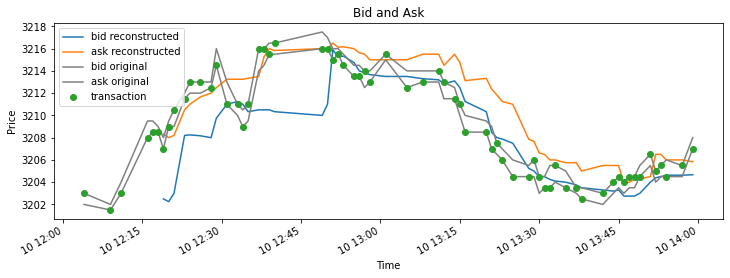

In [154]:
TIME0 = '2013-09-10 12:00'
TIME1 = '2013-09-10 14:00'
selection = df_transaction['transaction'][TIME0:TIME1]

N = 6
ask, bid = f(selection, N)

df_bid_ask_reconstructed = pd.DataFrame(selection)
df_bid_ask_reconstructed['bid'] = bid
df_bid_ask_reconstructed['ask'] = ask

selection = df_transaction[TIME0:TIME1].index.values
plt.figure(figsize=(12, 4))
df_bid_ask_reconstructed['bid'].plot(label='bid reconstructed')
df_bid_ask_reconstructed['ask'].plot(label='ask reconstructed')
df_bid_ask['bid'].loc[selection].plot(label='bid original', color='#808080')
df_bid_ask['ask'].loc[selection].plot(label='ask original', color='#808080')
df_transaction['transaction'].loc[selection].plot(label='transaction', style='o')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bid and Ask')
plt.legend(loc='upper left')
plt.show()

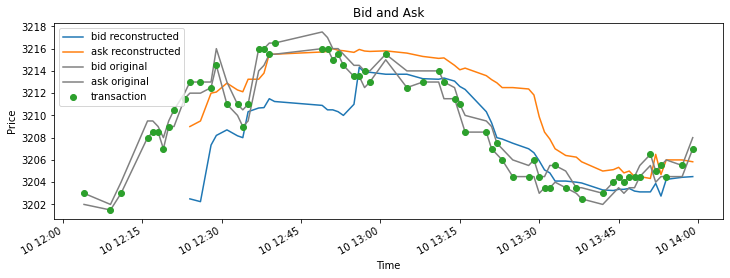

In [153]:
TIME0 = '2013-09-10 12:00'
TIME1 = '2013-09-10 14:00'
selection = df_transaction['transaction'][TIME0:TIME1]

N = 10
ask, bid = f(selection, N)

df_bid_ask_reconstructed = pd.DataFrame(selection)
df_bid_ask_reconstructed['bid'] = bid
df_bid_ask_reconstructed['ask'] = ask

selection = df_transaction[TIME0:TIME1].index.values
plt.figure(figsize=(12, 4))
df_bid_ask_reconstructed['bid'].plot(label='bid reconstructed')
df_bid_ask_reconstructed['ask'].plot(label='ask reconstructed')
df_bid_ask['bid'].loc[selection].plot(label='bid original', color='#808080')
df_bid_ask['ask'].loc[selection].plot(label='ask original', color='#808080')
df_transaction['transaction'].loc[selection].plot(label='transaction', style='o')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bid and Ask')
plt.legend(loc='upper left')
plt.show()

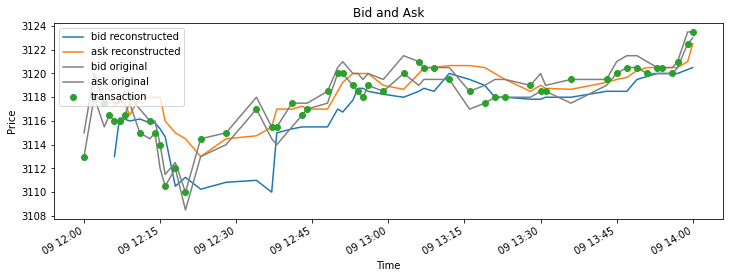

In [157]:
TIME0 = '2013-09-09 12:00'
TIME1 = '2013-09-09 14:00'
selection = df_transaction['transaction'][TIME0:TIME1]

N = 4
ask, bid = f(selection, N)

df_bid_ask_reconstructed = pd.DataFrame(selection)
df_bid_ask_reconstructed['bid'] = bid
df_bid_ask_reconstructed['ask'] = ask

selection = df_transaction[TIME0:TIME1].index.values
plt.figure(figsize=(12, 4))
df_bid_ask_reconstructed['bid'].plot(label='bid reconstructed')
df_bid_ask_reconstructed['ask'].plot(label='ask reconstructed')
df_bid_ask['bid'].loc[selection].plot(label='bid original', color='#808080')
df_bid_ask['ask'].loc[selection].plot(label='ask original', color='#808080')
df_transaction['transaction'].loc[selection].plot(label='transaction', style='o')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bid and Ask')
plt.legend(loc='upper left')
plt.show()